In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

import plotly.express as px

import plotly.graph_objects as go

import streamlit as st

st.title("Your App Title")
st.write("Welcome to your Streamlit app!")







elec = pd.read_csv('/kaggle/input/dpeda-data/2107_electrical_data.csv', parse_dates=True)

elec.head()



irr = pd.read_csv('/kaggle/input/dpeda-data/2107_irradiance_data.csv', parse_dates=True)

irr.head()



meter = pd.read_csv('/kaggle/input/dpeda-data/2107_meter_15m_data.csv', parse_dates=True)

meter.head()



env = pd.read_csv('/kaggle/input/dpeda-data/2107_environment_data.csv', parse_dates=True)

env.head()



elec['measured_on'] = pd.to_datetime(elec['measured_on'])

irr['measured_on'] = pd.to_datetime(irr['measured_on'])

meter['measured_on'] = pd.to_datetime(meter['measured_on'])

env['measured_on'] = pd.to_datetime(env['measured_on'])



elec = elec[(elec['measured_on'] >= '2017-12-01 00:00:00') & (elec['measured_on'] <= '2023-10-31 23:45:00')]

irr = irr[(irr['measured_on'] >= '2017-12-01 00:00:00') & (irr['measured_on'] <= '2023-10-31 23:45:00')]

meter = meter[(meter['measured_on'] >= '2017-12-01 00:00:00') & (meter['measured_on'] <= '2023-10-31 23:45:00')]

env = env[(env['measured_on'] >= '2017-12-01 00:00:00') & (env['measured_on'] <= '2023-10-31 23:45:00')]



elec["DATE"] = pd.to_datetime(elec["measured_on"]).dt.date

elec["TIME"] = pd.to_datetime(elec["measured_on"]).dt.time

elec['DAY'] = pd.to_datetime(elec['measured_on']).dt.day

elec['MONTH'] = pd.to_datetime(elec['measured_on']).dt.month

elec['WEEK'] = pd.to_datetime(elec['measured_on']).dt.isocalendar().week  # Updated method for weeks in newer versions of pandas

elec['YEAR'] = pd.to_datetime(elec['measured_on']).dt.year



elec['HOURS'] = pd.to_datetime(elec['TIME'], format='%H:%M:%S').dt.hour

elec['MINUTES'] = pd.to_datetime(elec['TIME'], format='%H:%M:%S').dt.minute

elec['TOTAL MINUTES PASS'] = elec['MINUTES'] + elec['HOURS'] * 60



# Merging all DataFrames into one DataFrame named 'df'

# Assuming 'measured_on' is the common key to merge on

df = pd.merge(elec, irr, on='measured_on', how='outer')  # 'outer' join ensures all data is preserved

df = pd.merge(df, meter, on='measured_on', how='outer')

df = pd.merge(df, env, on='measured_on', how='outer')



# prompt: copy df to df_1 and do # Interpolating missing values linearly

# df.interpolate(method='linear', inplace=True)

# for the nal values



df_1 = df.copy()

df_1.interpolate(method='linear', inplace=True)

df_1.isna().sum()



rename_dict = {

    'measured_on': 'measured_on',

    'inv_01_dc_current_inv_149579': '01_dc_current',

    'inv_01_dc_voltage_inv_149580': '01_dc_voltage',

    'inv_01_ac_current_inv_149581': '01_ac_current',

    'inv_01_ac_voltage_inv_149582': '01_ac_voltage',

    'inv_01_ac_power_inv_149583': '01_ac_power',

    'inv_02_dc_current_inv_149584': '02_dc_current',

    'inv_02_dc_voltage_inv_149585': '02_dc_voltage',

    'inv_02_ac_current_inv_149586': '02_ac_current',

    'inv_02_ac_voltage_inv_149587': '02_ac_voltage',

    'inv_02_ac_power_inv_149588': '02_ac_power',

    'inv_03_dc_current_inv_149589': '03_dc_current',

    'inv_03_dc_voltage_inv_149590': '03_dc_voltage',

    'inv_03_ac_current_inv_149591': '03_ac_current',

    'inv_03_ac_voltage_inv_149592': '03_ac_voltage',

    'inv_03_ac_power_inv_149593': '03_ac_power',

    'inv_04_dc_current_inv_149594': '04_dc_current',

    'inv_04_dc_voltage_inv_149595': '04_dc_voltage',

    'inv_04_ac_current_inv_149596': '04_ac_current',

    'inv_04_ac_voltage_inv_149597': '04_ac_voltage',

    'inv_04_ac_power_inv_149598': '04_ac_power',

    'inv_05_dc_current_inv_149599': '05_dc_current',

    'inv_05_ac_current_inv_149601': '05_ac_current',

    'inv_05_ac_voltage_inv_149602': '05_ac_voltage',



    'inv_05_ac_power_inv_149603': '05_ac_power',

    'inv_06_dc_current_inv_149604': '06_dc_current',

    'inv_06_dc_voltage_inv_149605': '06_dc_voltage',

    'inv_06_ac_current_inv_149606': '06_ac_current',

    'inv_06_ac_voltage_inv_149607': '06_ac_voltage',

    'inv_06_ac_power_inv_149608': '06_ac_power',

    'inv_07_dc_current_inv_149609': '07_dc_current',

    'inv_07_dc_voltage_inv_149610': '07_dc_voltage',

    'inv_07_ac_current_inv_149611': '07_ac_current',

    'inv_07_ac_voltage_inv_149612': '07_ac_voltage',

    'inv_07_ac_power_inv_149613': '07_ac_power',

    'inv_08_dc_current_inv_149614': '08_dc_current',

    'inv_08_dc_voltage_inv_149615': '08_dc_voltage',

    'inv_08_ac_current_inv_149616': '08_ac_current',

    'inv_08_ac_voltage_inv_149617': '08_ac_voltage',

    'inv_08_ac_power_inv_149618': '08_ac_power',

    'inv_09_dc_current_inv_149619': '09_dc_current',

    'inv_09_dc_voltage_inv_149620': '09_dc_voltage',

    'inv_09_ac_current_inv_149621': '09_ac_current',

    'inv_09_ac_voltage_inv_149622': '09_ac_voltage',

    'inv_09_ac_power_inv_149623': '09_ac_power',

    'inv_10_dc_current_inv_149624': '10_dc_current',

    'inv_10_dc_voltage_inv_149625': '10_dc_voltage',

    'inv_10_ac_current_inv_149626': '10_ac_current',

    'inv_10_ac_voltage_inv_149627': '10_ac_voltage',

    'inv_10_ac_power_inv_149628': '10_ac_power',

    'inv_11_dc_current_inv_149629': '11_dc_current',

    'inv_11_dc_voltage_inv_149630': '11_dc_voltage',

    'inv_11_ac_current_inv_149631': '11_ac_current',

    'inv_11_ac_voltage_inv_149632': '11_ac_voltage',

    'inv_11_ac_power_inv_149633': '11_ac_power',

    'inv_12_dc_current_inv_149634': '12_dc_current',

    'inv_12_dc_voltage_inv_149635': '12_dc_voltage',

    'inv_12_ac_current_inv_149636': '12_ac_current',

    'inv_12_ac_voltage_inv_149637': '12_ac_voltage',

    'inv_12_ac_power_inv_149638': '12_ac_power',

    'inv_13_dc_current_inv_149639': '13_dc_current',

    'inv_13_dc_voltage_inv_149640': '13_dc_voltage',

    'inv_13_ac_current_inv_149641': '13_ac_current',

    'inv_13_ac_voltage_inv_149642': '13_ac_voltage',

    'inv_13_ac_power_inv_149643': '13_ac_power',

    'inv_14_dc_current_inv_149644': '14_dc_current',

    'inv_14_dc_voltage_inv_149645': '14_dc_voltage',

    'inv_14_ac_current_inv_149646': '14_ac_current',

    'inv_14_ac_voltage_inv_149647': '14_ac_voltage',

    'inv_14_ac_power_inv_149648': '14_ac_power',

    'inv_15_dc_current_inv_149649': '15_dc_current',

    'inv_15_dc_voltage_inv_149650': '15_dc_voltage',

    'inv_15_ac_current_inv_149651': '15_ac_current',

    'inv_15_ac_voltage_inv_149652': '15_ac_voltage',

    'inv_15_ac_power_iinv_149653': '15_ac_power',

    'inv_16_dc_current_inv_149654': '16_dc_current',

    'inv_16_dc_voltage_inv_149655': '16_dc_voltage',

    'inv_16_ac_current_inv_149656': '16_ac_current',

    'inv_16_ac_voltage_inv_149657': '16_ac_voltage',

    'inv_16_ac_power_inv_149658': '16_ac_power',

    'inv_17_dc_current_inv_149659': '17_dc_current',

    'inv_17_dc_voltage_inv_149660': '17_dc_voltage',

    'inv_17_ac_current_inv_149661': '17_ac_current',

    'inv_17_ac_voltage_inv_149662': '17_ac_voltage',

    'inv_17_ac_power_inv_149663': '17_ac_power',

    'inv_18_dc_current_inv_149664': '18_dc_current',

    'inv_18_dc_voltage_inv_149665': '18_dc_voltage',

    'inv_18_ac_current_inv_149666': '18_ac_current',

    'inv_18_ac_voltage_inv_149667': '18_ac_voltage',

    'inv_18_ac_power_inv_149668': '18_ac_power',

    'inv_19_dc_current_inv_149669': '19_dc_current',

    'inv_19_dc_voltage_inv_149670': '19_dc_voltage',

    'inv_19_ac_current_inv_149671': '19_ac_current',

    'inv_19_ac_voltage_inv_149672': '19_ac_voltage',

    'inv_19_ac_power_inv_149673': '19_ac_power',

    'inv_20_dc_current_inv_149674': '20_dc_current',

    'inv_20_dc_voltage_inv_149675': '20_dc_voltage',

    'inv_20_ac_current_inv_149676': '20_ac_current',

    'inv_20_ac_voltage_inv_149677': '20_ac_voltage',

    'inv_20_ac_power_inv_149678': '20_ac_power',

    'inv_21_dc_current_inv_149679': '21_dc_current',

    'inv_21_dc_voltage_inv_149680': '21_dc_voltage',

    'inv_21_ac_current_inv_149681': '21_ac_current',

    'inv_21_ac_voltage_inv_149682': '21_ac_voltage',

    'inv_21_ac_power_inv_149683': '21_ac_power',

    'inv_22_dc_current_inv_149684': '22_dc_current',

    'inv_22_dc_voltage_inv_149685': '22_dc_voltage',

    'inv_22_ac_current_inv_149686': '22_ac_current',

    'inv_22_ac_voltage_inv_149687': '22_ac_voltage',

    'inv_22_ac_power_inv_149688': '22_ac_power',

    'inv_23_dc_current_inv_149689': '23_dc_current',

    'inv_23_dc_voltage_inv_149690': '23_dc_voltage',

    'inv_23_ac_current_inv_149691': '23_ac_current',

    'inv_23_ac_voltage_inv_149692': '23_ac_voltage',

    'inv_23_ac_power_inv_149693': '23_ac_power',

    'inv_24_dc_current_inv_149694': '24_dc_current',

    'inv_24_dc_voltage_inv_149695': '24_dc_voltage',

    'inv_24_ac_current_inv_149696': '24_ac_current',

    'inv_24_ac_voltage_inv_149697': '24_ac_voltage',

    'inv_24_ac_power_inv_149698': '24_ac_power',

    'poa_irradiance_o_149574': 'poa_irradiance',

    'meter_revenue_grade_ac_output_meter_149578': 'revenue_ac_output',

    'ambient_temperature_o_149575': 'ambient_temp',

    'wind_speed_o_149576': 'wind_speed',

    'wind_direction_o_149577': 'wind_direction'

}



# Apply renaming

df_1.rename(columns=rename_dict, inplace=True)



# Drop columns if they exist, otherwise ignore

columns_to_drop = [

    '05_dc_current', '05_ac_current',

    '05_ac_voltage',

    '05_ac_power'

]



for col in columns_to_drop:

    if col in df_1.columns:

        df_1 = df_1.drop(columns=[col])





# Assuming you have a list of inverter numbers (excluding 5)

inverter_numbers = list(range(1, 25))



# Function to calculate DC power for each inverter based on DC current and voltage

def calculate_dc_power(row, inverter_num):

    dc_current_col = f"{inverter_num:02d}_dc_current"

    dc_voltage_col = f"{inverter_num:02d}_dc_voltage"

    return row[dc_current_col] * row[dc_voltage_col]



# Apply the function across the dataframe for each inverter

for i in inverter_numbers:

    # Skip the inverter 5 columns since they were dropped

    if i == 5:

        continue



    # Calculate DC power directly and assign to the new column

    df_1[f"{i:02d}_dc_power"] = df_1.apply(calculate_dc_power, axis=1, inverter_num=i)



# Convert 'ambient_temp' from Fahrenheit to Celsius

df_1['ambient_temp'] = (df_1['ambient_temp'] - 32) * 5/9





# Display a random sample of 5 rows to check the results

df_1.sample(n=5, random_state=1)






,measured_on,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,...,15_dc_power,16_dc_power,17_dc_power,18_dc_power,19_dc_power,20_dc_power,21_dc_power,22_dc_power,23_dc_power,24_dc_power
596254,2023-08-02 13:50:00,50.138,592.025,33.012,293.107,29.025,49.784,583.758,32.301,293.107,...,29861.805780,30065.402568,30001.999590,30106.048375,29984.808045,30478.515915,25762.577424,30217.283436,30241.137060,30220.933005
158470,2019-06-04 07:50:00,10.773,690.442,8.430,283.895,6.995,0.000,0.000,0.000,0.000,...,7268.848115,7271.637321,7343.713961,7504.130920,3661.761220,7645.477598,7532.636145,7159.698144,7375.714800,7062.352752
44940,2018-05-06 02:00:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85061,2018-09-22 09:25:00,19.373,710.216,15.754,287.142,13.320,19.657,709.163,16.029,287.051,...,14322.714640,14427.168790,14456.695758,14460.467135,14537.609922,14779.556754,14864.717403,14749.167876,14786.569614,14569.521030
119798,2019-01-21 00:10:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [2]:
# List of inverter numbers (excluding 5)

inverter_numbers = list(range(1, 25))



# Iterate through inverter numbers to calculate efficiency

for i in inverter_numbers:

    # Skip the calculations for inverter 5

    if i == 5:

        continue



    # Define column names for DC and AC power

    dc_power_col = f"{i:02d}_dc_power"

    ac_power_col = f"{i:02d}_ac_power"

    efficiency_col = f"{i:02d}_efficiency %"



    # Calculate efficiency (AC/DC ratio) and handle division by zero

    df_1[efficiency_col] = df_1[ac_power_col] / df_1[dc_power_col] *100

    df_1[efficiency_col] = df_1[efficiency_col].replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN

    df_1[efficiency_col] = df_1[efficiency_col].fillna(0)  # Optionally fill NaN with 0 (or other desired value)



# Display the first few rows of the dataframe to verify the new columns

df_1.head()


,measured_on,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
0,2017-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-12-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-12-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-12-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-12-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Identify columns with missing values

columns_with_na = df_1.columns[df_1.isna().any()].tolist()



# Display the list of columns with NA values

print("Columns with NA values:", columns_with_na)



# Remove rows with any NA values

df_1 = df_1.dropna()







columns_with_na = df_1.columns[df_1.isna().any()].tolist()



# Display the list of columns with NA values

print("Columns with NA values:", columns_with_na)



# Display the updated dataframe

df_1.head()

Columns with NA values: ['poa_irradiance']
Columns with NA values: []


,measured_on,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
1,2017-12-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-12-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-12-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-12-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2017-12-01 00:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_1.isna().sum()

measured_on        0
01_dc_current      0
01_dc_voltage      0
01_ac_current      0
01_ac_voltage      0
                  ..
20_efficiency %    0
21_efficiency %    0
22_efficiency %    0
23_efficiency %    0
24_efficiency %    0
Length: 176, dtype: int64

THIS IS ALL OF DF 1

In [5]:
df_18=df_1.copy()

df_18=df_1[df_1['measured_on'].dt.year == 2018]



df_18.head()

,measured_on,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
8928,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8929,2018-01-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8930,2018-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8931,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8932,2018-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_18_jan = df_18[(df_18['measured_on'].dt.month == 1) & (df_18['measured_on'].dt.year == 2018)]

df_18_jan['measured_on'] = pd.to_datetime(df_18_jan['measured_on'])



df_18_jan.sample(n=5, random_state=1)


,measured_on,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
15634,2018-01-24 06:50:00,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.0,0.000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
13450,2018-01-16 16:50:00,0.554,634.795,0.0,285.95,0.268,0.757,648.924,0.0,286.068,...,0.05945,0.065211,0.06583,0.072213,0.072258,0.072663,0.066614,0.082514,0.07232,0.085386
10969,2018-01-08 02:05:00,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.0,0.000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
11275,2018-01-09 03:35:00,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.0,0.000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
16990,2018-01-28 23:50:00,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.0,0.000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [7]:
from sklearn.impute import KNNImputer

import numpy as np



# Initialize KNNImputer with n_neighbors=5 (you can change this based on your preference)

knn_imputer = KNNImputer(n_neighbors=5)



# List of efficiency columns (you can adjust based on your data)

efficiency_cols = [f'{i:02d}_efficiency %' for i in range(1, 25) if i != 5]  # excluding 05_efficiency



# Apply KNN imputation to the efficiency columns only

df_18_jan[efficiency_cols] = knn_imputer.fit_transform(df_18_jan[efficiency_cols])



# Display the dataframe after imputation (showing the first few rows)

df_18_jan[efficiency_cols].head()


,01_efficiency %,02_efficiency %,03_efficiency %,04_efficiency %,06_efficiency %,07_efficiency %,08_efficiency %,09_efficiency %,10_efficiency %,11_efficiency %,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
8928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_18_jan.describe()

,measured_on,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
count,8928,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,...,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000,8928.000000
mean,2018-01-16 11:57:30,4.435058,287.199225,3.578719,123.332317,3.115705,4.638329,292.658840,3.665587,123.615195,...,0.034806,0.035538,0.035312,0.035551,0.035977,0.035975,0.035988,0.037304,0.035858,0.036697
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-01-08 17:58:45,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018-01-16 11:57:30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2018-01-24 05:56:15,4.239000,705.681500,3.543000,286.671000,3.019000,4.666250,705.547500,3.668000,286.698000,...,0.094277,0.095932,0.095167,0.096104,0.096599,0.096004,0.097023,0.098346,0.096981,0.097296
max,2018-01-31 23:55:00,40.689000,865.884000,33.239000,302.076000,29.192000,40.627000,859.504000,33.039000,302.051000,...,0.155308,0.227800,0.103281,0.104371,0.135927,0.414406,0.160590,0.209066,0.220479,0.382479
std,NaN,8.855683,341.563233,7.064361,142.849308,6.188494,9.025448,344.025844,7.135022,142.882127,...,0.045084,0.045648,0.045285,0.045601,0.045908,0.045906,0.046068,0.047332,0.046067,0.046824


In [9]:
from scipy import stats

import numpy as np



# List of efficiency columns for all inverters except 05

efficiency_columns = [f"{i:02d}_efficiency %" for i in range(1, 25) if i != 5]



# Calculate Z-scores for the efficiency columns

z_scores = np.abs(stats.zscore(df_18_jan[efficiency_columns], nan_policy='omit'))



# Define a threshold for identifying outliers (commonly 3)

threshold = 3



# Create a mask to filter out rows with Z-scores greater than the threshold

mask = (z_scores < threshold).all(axis=1)



# Remove rows with outliers in the efficiency columns

df_18_jan_clean = df_18_jan[mask]



# Display the cleaned dataframe

df_18_jan_clean.head()


,measured_on,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
8928,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8929,2018-01-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8930,2018-01-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8931,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8932,2018-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


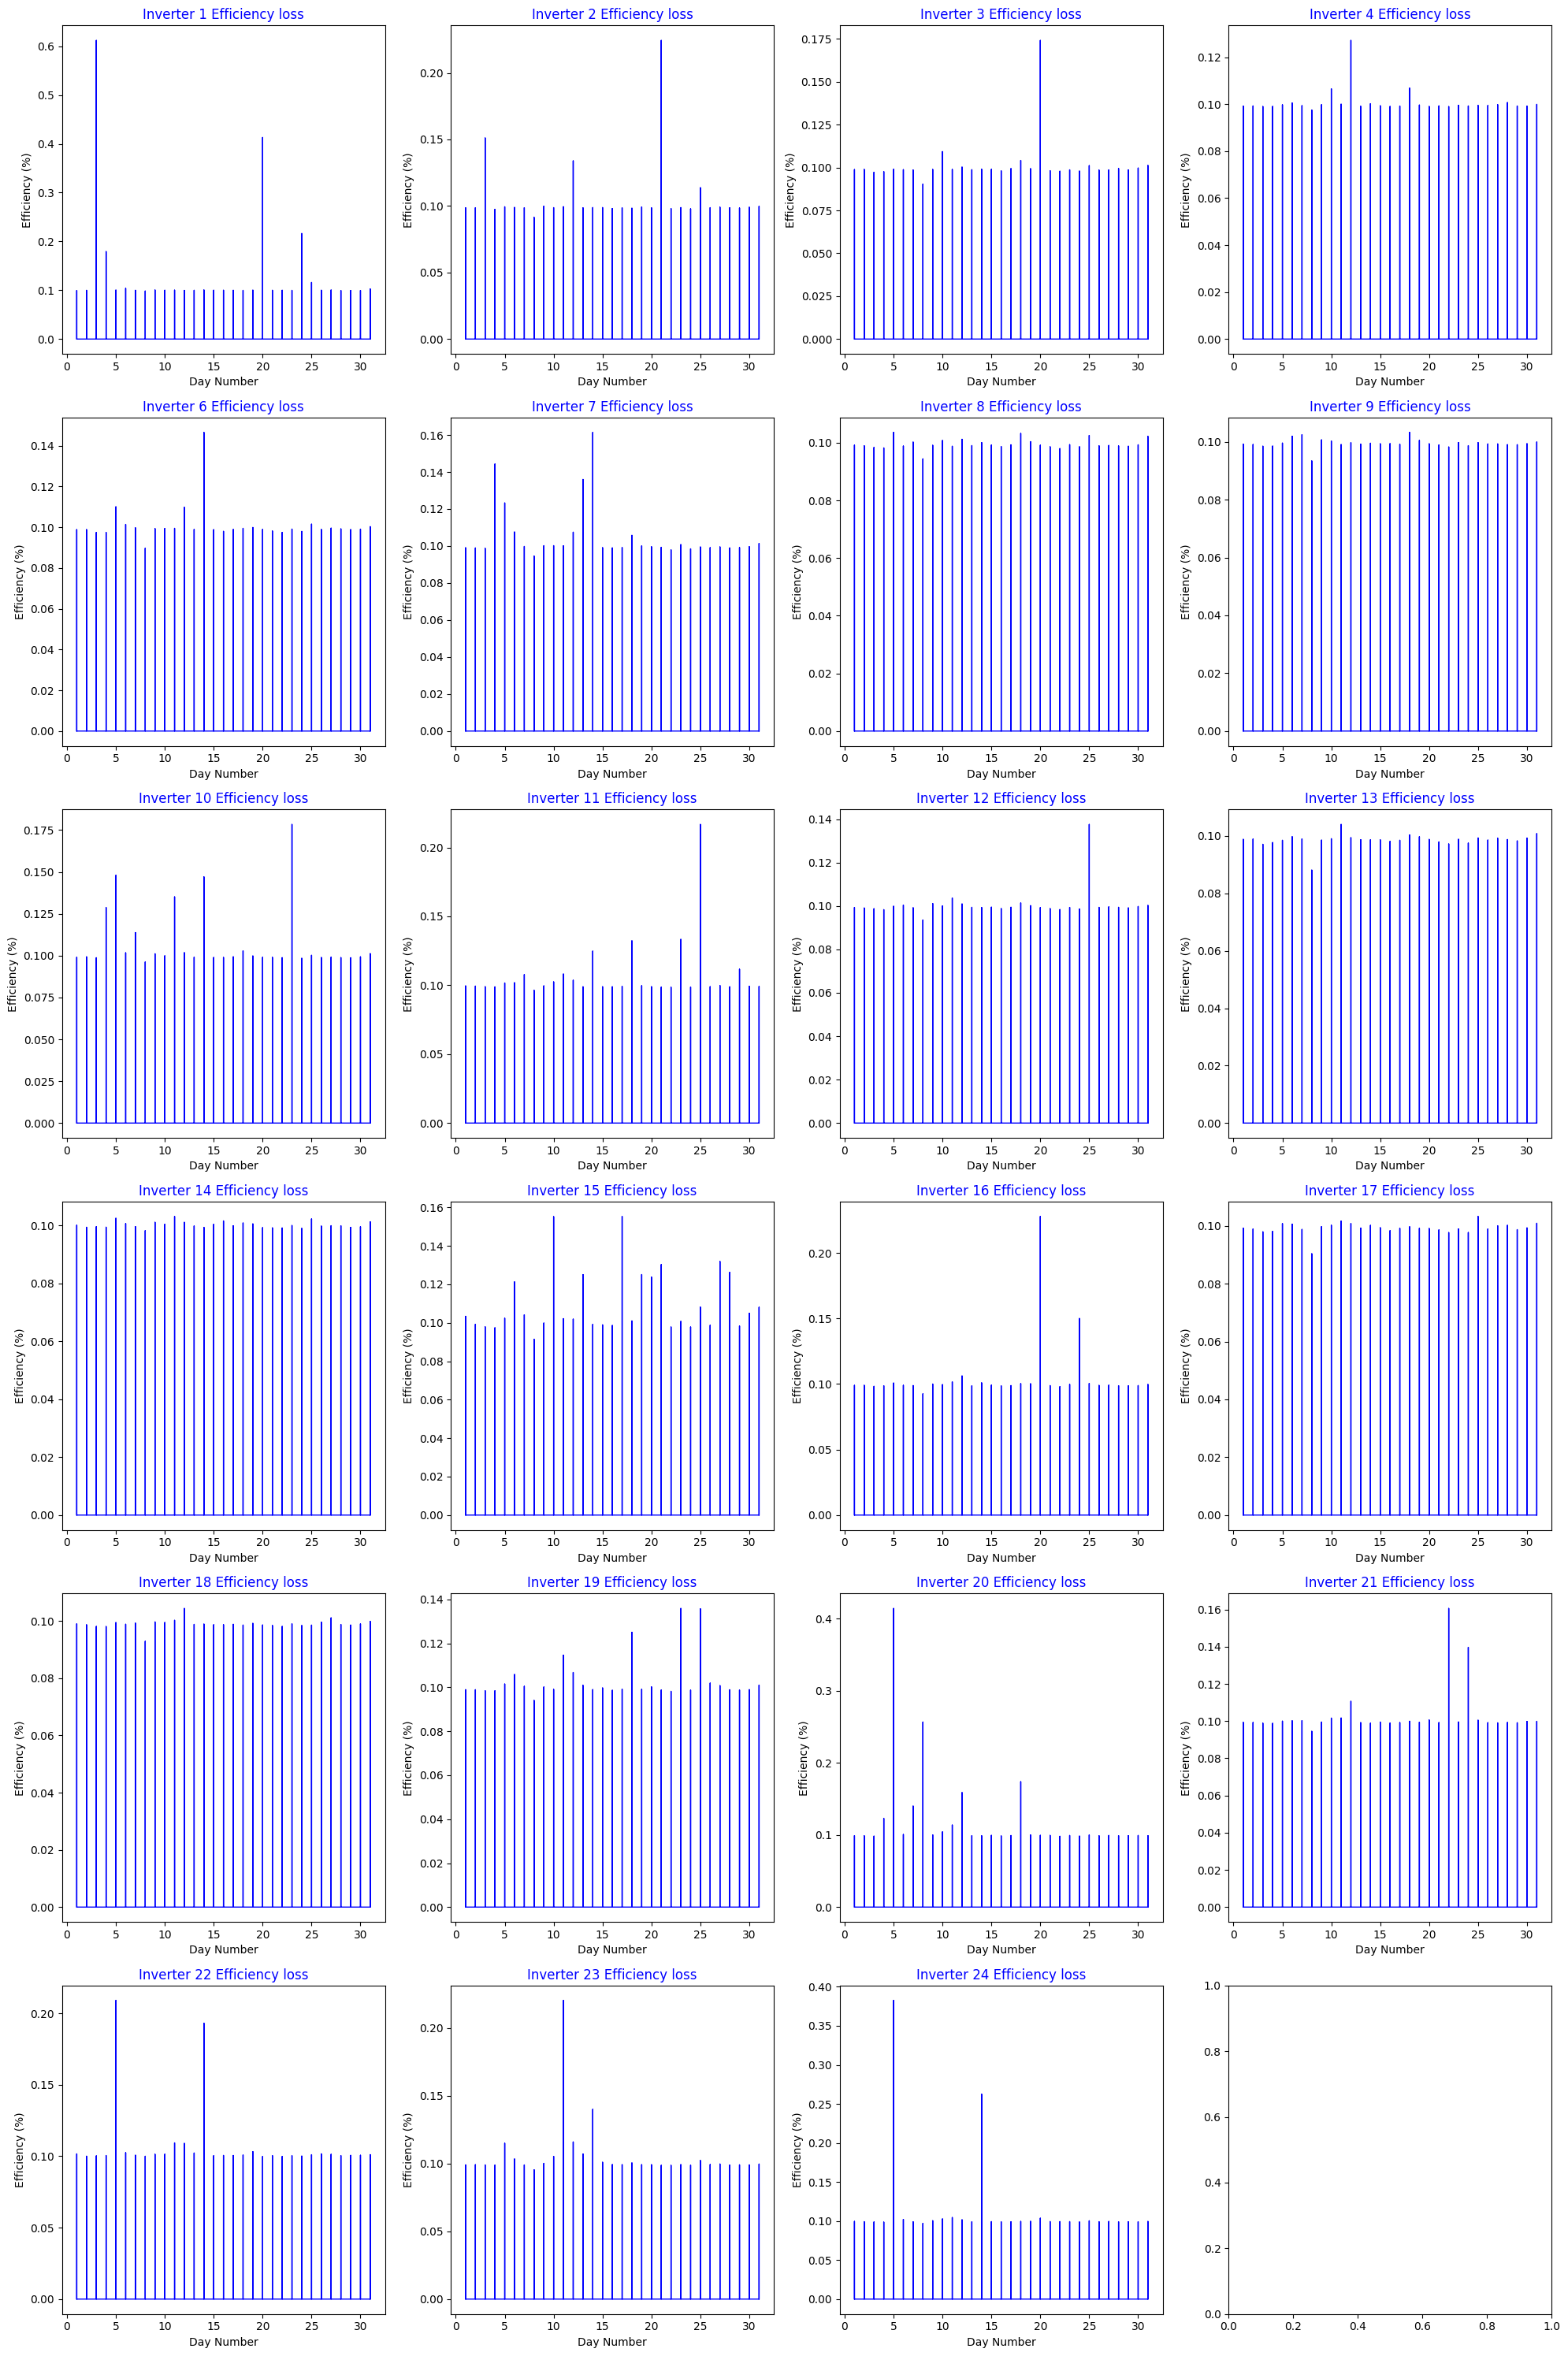

In [10]:
import matplotlib.pyplot as plt



# Extract day numbers from the 'measured_on' column and create a new column

df_18_jan['day_number'] = df_18_jan['measured_on'].dt.day



# List of inverter numbers excluding 05

inverter_numbers = [i for i in range(1, 25) if i != 5]



# Create a plot for the efficiency of each inverter

def plot_efficiency(df):

    # Create a figure with a large size to fit all the plots

    fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))

    axes = axes.flatten()  # Flatten the axes array to easily iterate over it



    for idx, i in enumerate(inverter_numbers):

        # Column name for the efficiency of the current inverter

        efficiency_col = f"{i:02d}_efficiency %"



        # Plot the efficiency for the current inverter using day numbers on the x-axis

        axes[idx].plot(df['day_number'], df[efficiency_col], color='blue', linewidth=1)



        # Set title and labels

        axes[idx].set_title(f'Inverter {i} Efficiency loss', fontsize=12, color='blue')

        axes[idx].set_xlabel('Day Number')

        axes[idx].set_ylabel('Efficiency (%)')



    # Adjust layout for better spacing between plots

    plt.tight_layout()

    plt.show()



# Call the function to plot efficiency graphs

plot_efficiency(df_18_jan)


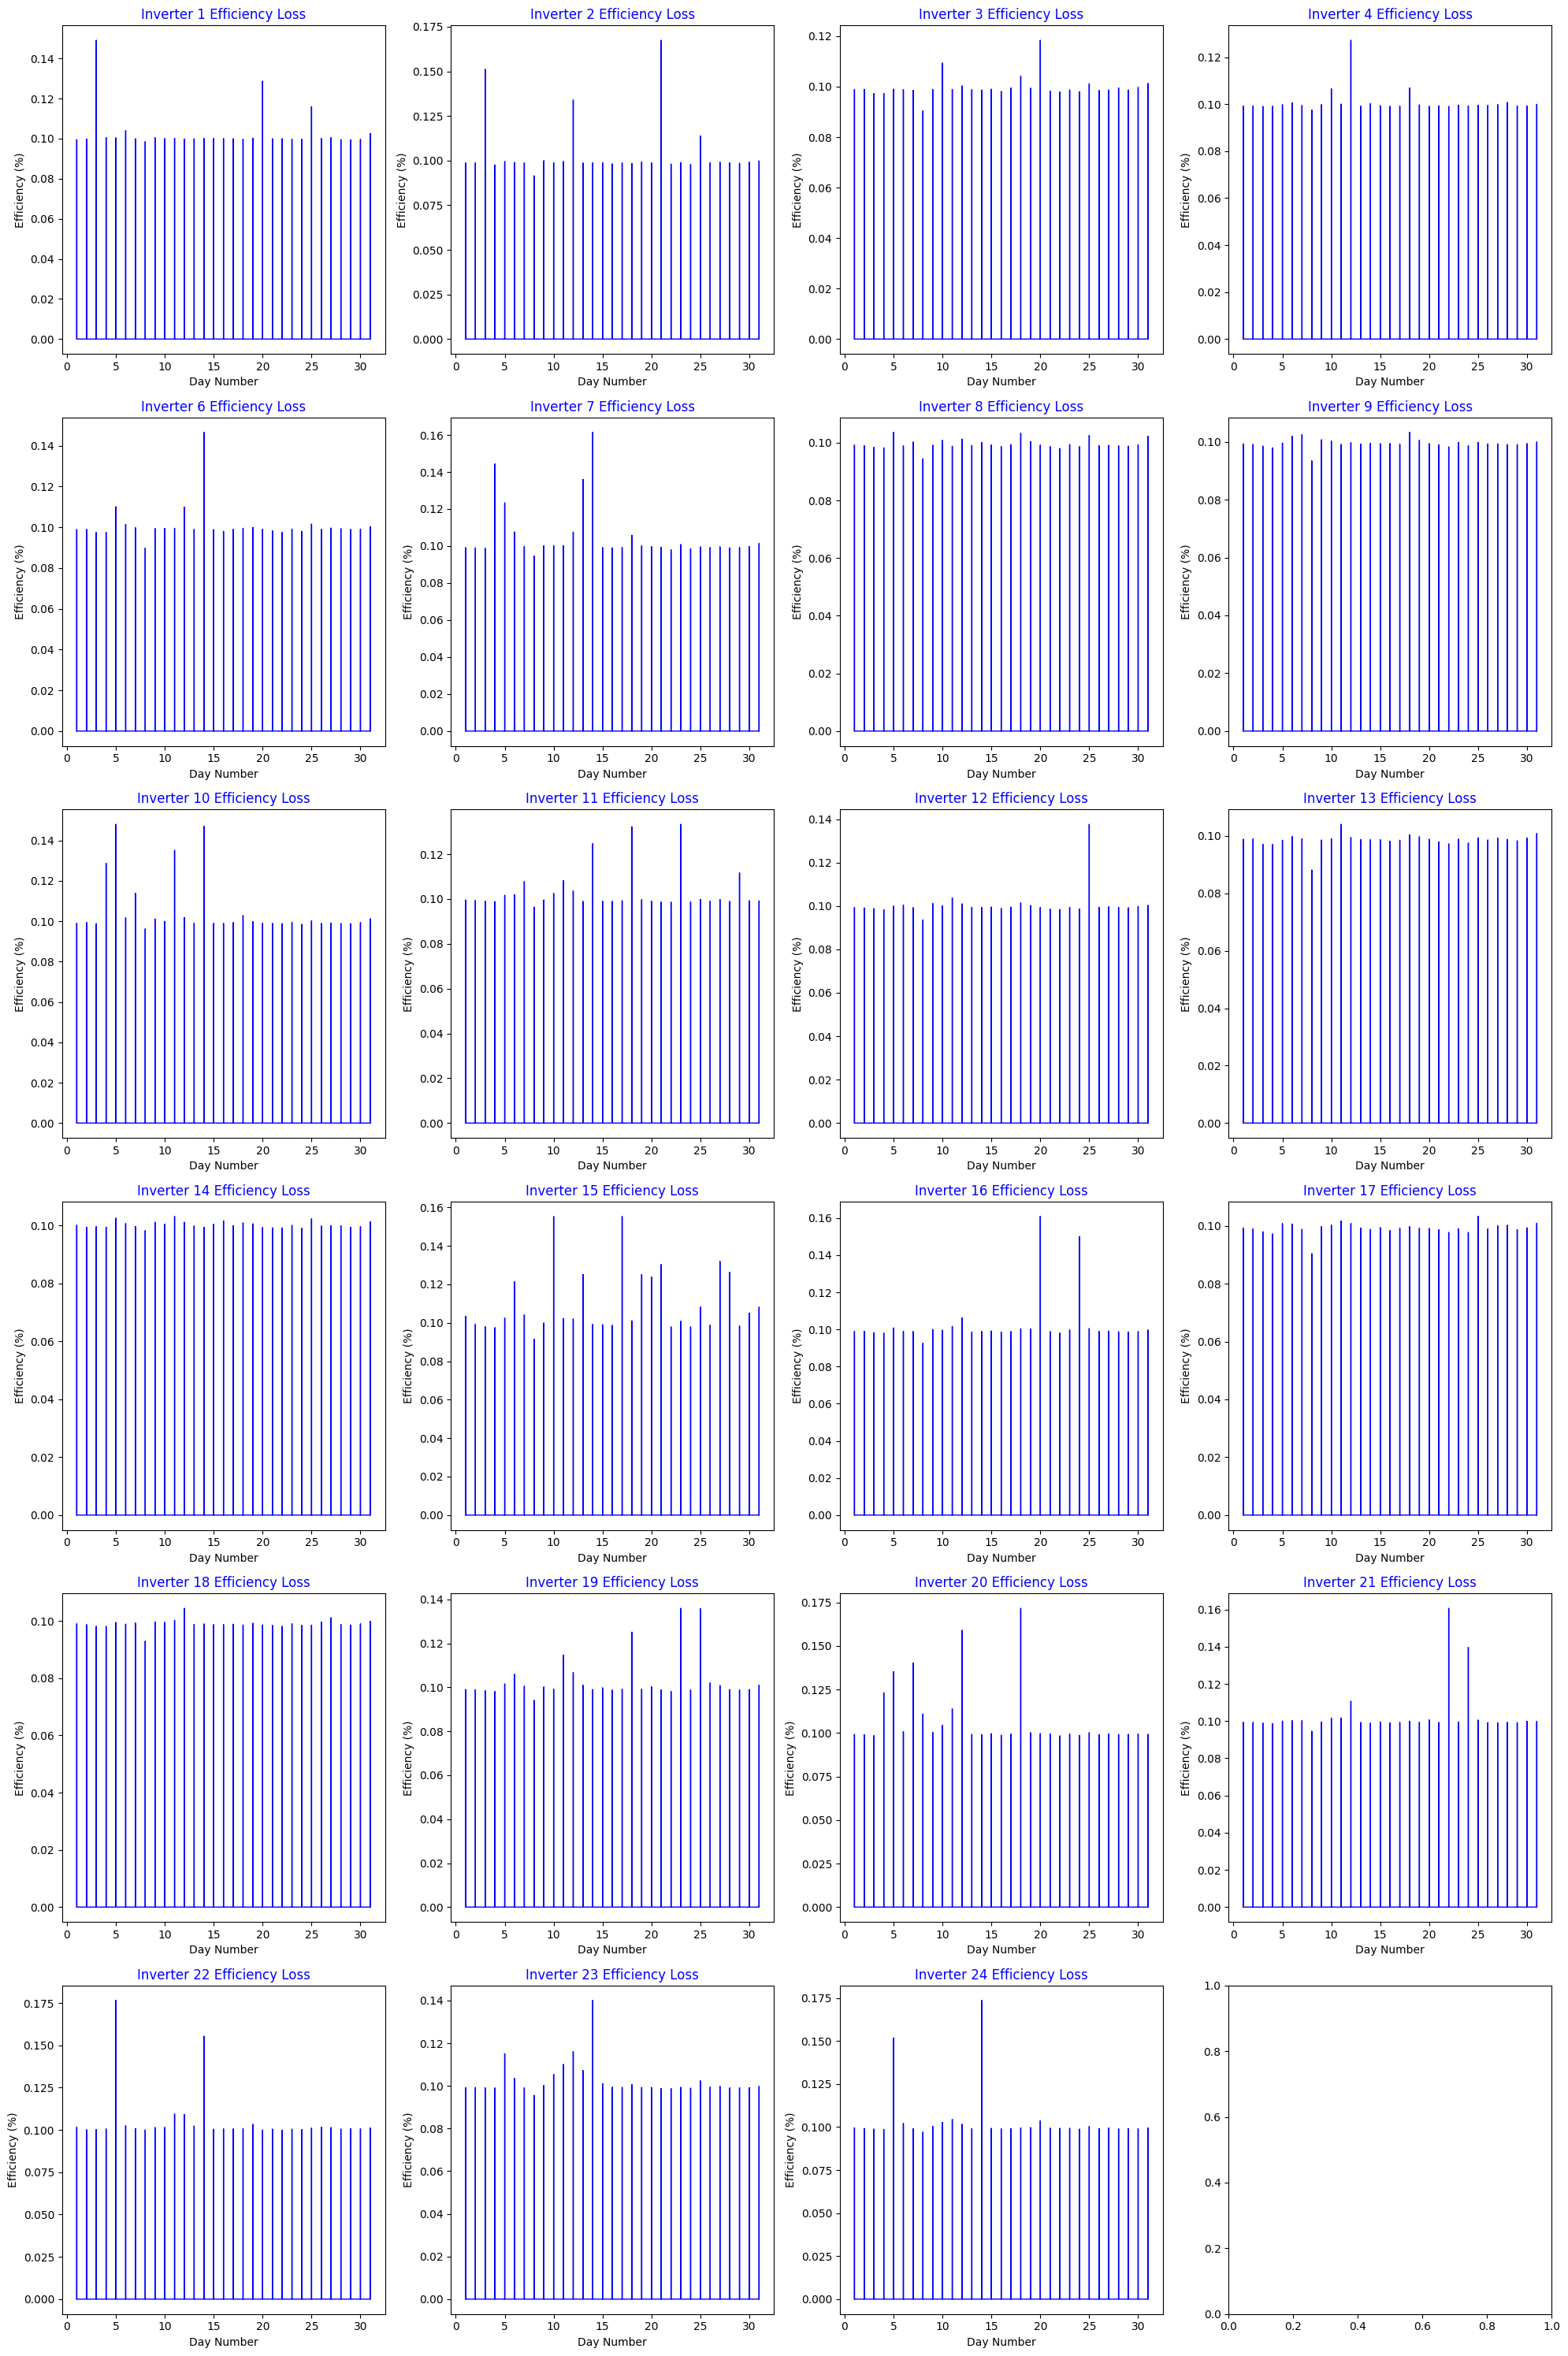

In [11]:
import matplotlib.pyplot as plt



# Ensure the 'day_number' column is extracted from 'measured_on'

df_18_jan_clean['day_number'] = df_18_jan_clean['measured_on'].dt.day



# List of inverter numbers excluding 05

inverter_numbers = [i for i in range(1, 25) if i != 5]



# Create a plot for the efficiency of each inverter

def plot_efficiency(df):

    # Create a figure with a large size to fit all the plots

    fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))

    axes = axes.flatten()  # Flatten the axes array to easily iterate over it



    for idx, i in enumerate(inverter_numbers):

        # Column name for the efficiency of the current inverter

        efficiency_col = f"{i:02d}_efficiency %"



        # Check if the column exists in the cleaned data before plotting

        if efficiency_col in df.columns:

            # Plot the efficiency for the current inverter using day numbers on the x-axis

            axes[idx].plot(df['day_number'], df[efficiency_col], color='blue', linewidth=1)



            # Set title and labels

            axes[idx].set_title(f'Inverter {i} Efficiency Loss', fontsize=12, color='blue')

            axes[idx].set_xlabel('Day Number')

            axes[idx].set_ylabel('Efficiency (%)')

        else:

            # If the column does not exist, leave the plot blank

            axes[idx].set_title(f'Inverter {i} Data Missing', fontsize=12, color='red')

            axes[idx].axis('off')  # Hide axis for missing data plots



    # Adjust layout for better spacing between plots

    plt.tight_layout()

    plt.show()



# Call the function to plot efficiency graphs for the cleaned data

plot_efficiency(df_18_jan_clean)


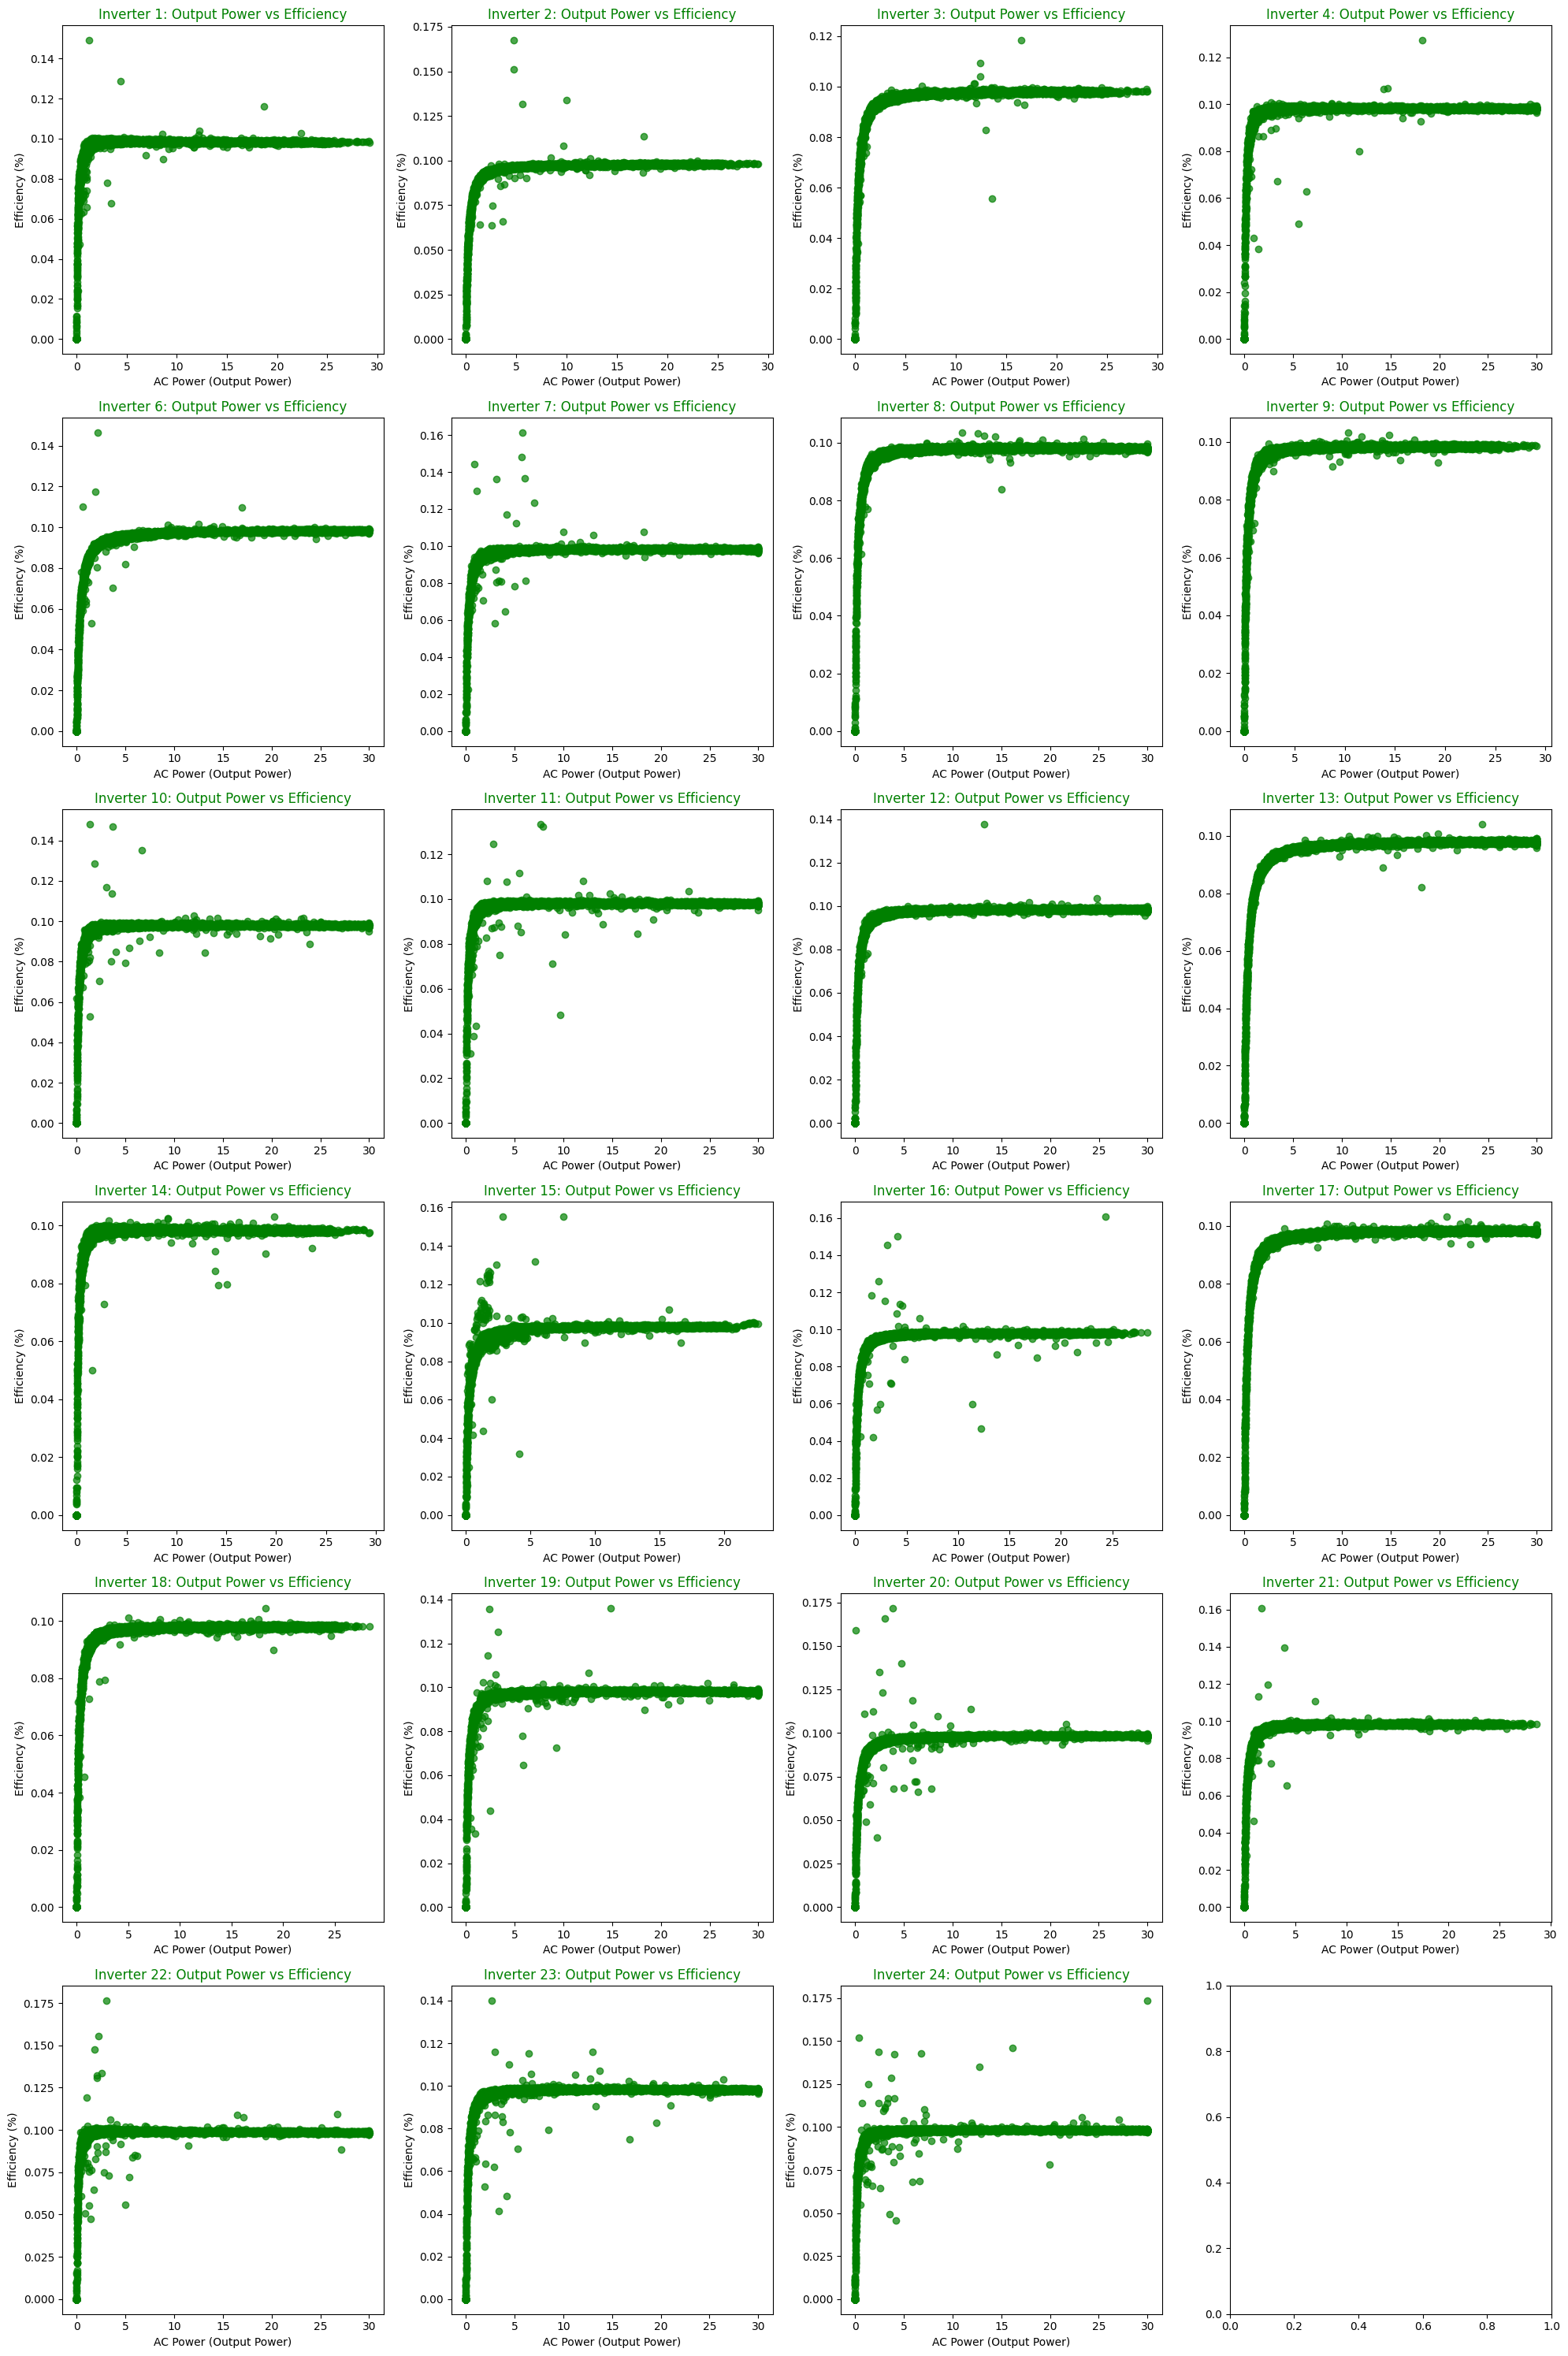

In [12]:
import matplotlib.pyplot as plt



# List of inverter numbers excluding 05

inverter_numbers = [i for i in range(1, 25) if i != 5]



# Create a plot for output power vs. efficiency for each inverter

def plot_output_power_vs_efficiency(df):

    # Create a figure with a large size to fit all the plots

    fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))

    axes = axes.flatten()  # Flatten the axes array to easily iterate over it



    for idx, i in enumerate(inverter_numbers):

        # Column names for AC power and efficiency for the current inverter

        ac_power_col = f"{i:02d}_ac_power"

        efficiency_col = f"{i:02d}_efficiency %"



        # Plot output power vs. efficiency for the current inverter

        axes[idx].scatter(df[ac_power_col], df[efficiency_col], color='green', alpha=0.7)



        # Set title and labels

        axes[idx].set_title(f'Inverter {i}: Output Power vs Efficiency', fontsize=12, color='green')

        axes[idx].set_xlabel('AC Power (Output Power)')

        axes[idx].set_ylabel('Efficiency (%)')



    # Adjust layout for better spacing between plots

    plt.tight_layout()

    plt.show()



# Call the function to plot output power vs. efficiency graphs

plot_output_power_vs_efficiency(df_18_jan_clean)


In [13]:
import numpy as np



# Iterate over the inverter numbers, skipping inverter 05

for i in range(1, 25):

    if i == 5:

        continue



    # Construct the column names for DC and AC power

    dc_power_col = f"{i:02d}_dc_power"

    ac_power_col = f"{i:02d}_ac_power"



    # Get the DC and AC power values

    dc_power = df_18_jan[df_18_jan[dc_power_col] > 0][dc_power_col].values

    ac_power = df_18_jan[df_18_jan[ac_power_col] > 0][ac_power_col].values



    if len(dc_power) > 0 and len(ac_power) > 0:  # Ensure there is data available for the inverter

        # Calculate the efficiency (AC/DC ratio)

        solar_plant_eff = (np.max(ac_power) / np.max(dc_power)) * 100



        print(f"Power ratio AC/DC (Efficiency) for Inverter {i:02d}: {solar_plant_eff:0.3f} %")

    else:

        print(f"No valid data for Inverter {i:02d}")


Power ratio AC/DC (Efficiency) for Inverter 01: 0.098 %
Power ratio AC/DC (Efficiency) for Inverter 02: 0.098 %
Power ratio AC/DC (Efficiency) for Inverter 03: 0.098 %
Power ratio AC/DC (Efficiency) for Inverter 04: 0.096 %
Power ratio AC/DC (Efficiency) for Inverter 06: 0.097 %
Power ratio AC/DC (Efficiency) for Inverter 07: 0.096 %
Power ratio AC/DC (Efficiency) for Inverter 08: 0.097 %
Power ratio AC/DC (Efficiency) for Inverter 09: 0.099 %
Power ratio AC/DC (Efficiency) for Inverter 10: 0.095 %
Power ratio AC/DC (Efficiency) for Inverter 11: 0.095 %
Power ratio AC/DC (Efficiency) for Inverter 12: 0.097 %
Power ratio AC/DC (Efficiency) for Inverter 13: 0.096 %
Power ratio AC/DC (Efficiency) for Inverter 14: 0.097 %
Power ratio AC/DC (Efficiency) for Inverter 15: 0.100 %
Power ratio AC/DC (Efficiency) for Inverter 16: 0.098 %
Power ratio AC/DC (Efficiency) for Inverter 17: 0.097 %
Power ratio AC/DC (Efficiency) for Inverter 18: 0.098 %
Power ratio AC/DC (Efficiency) for Inverter 19: 

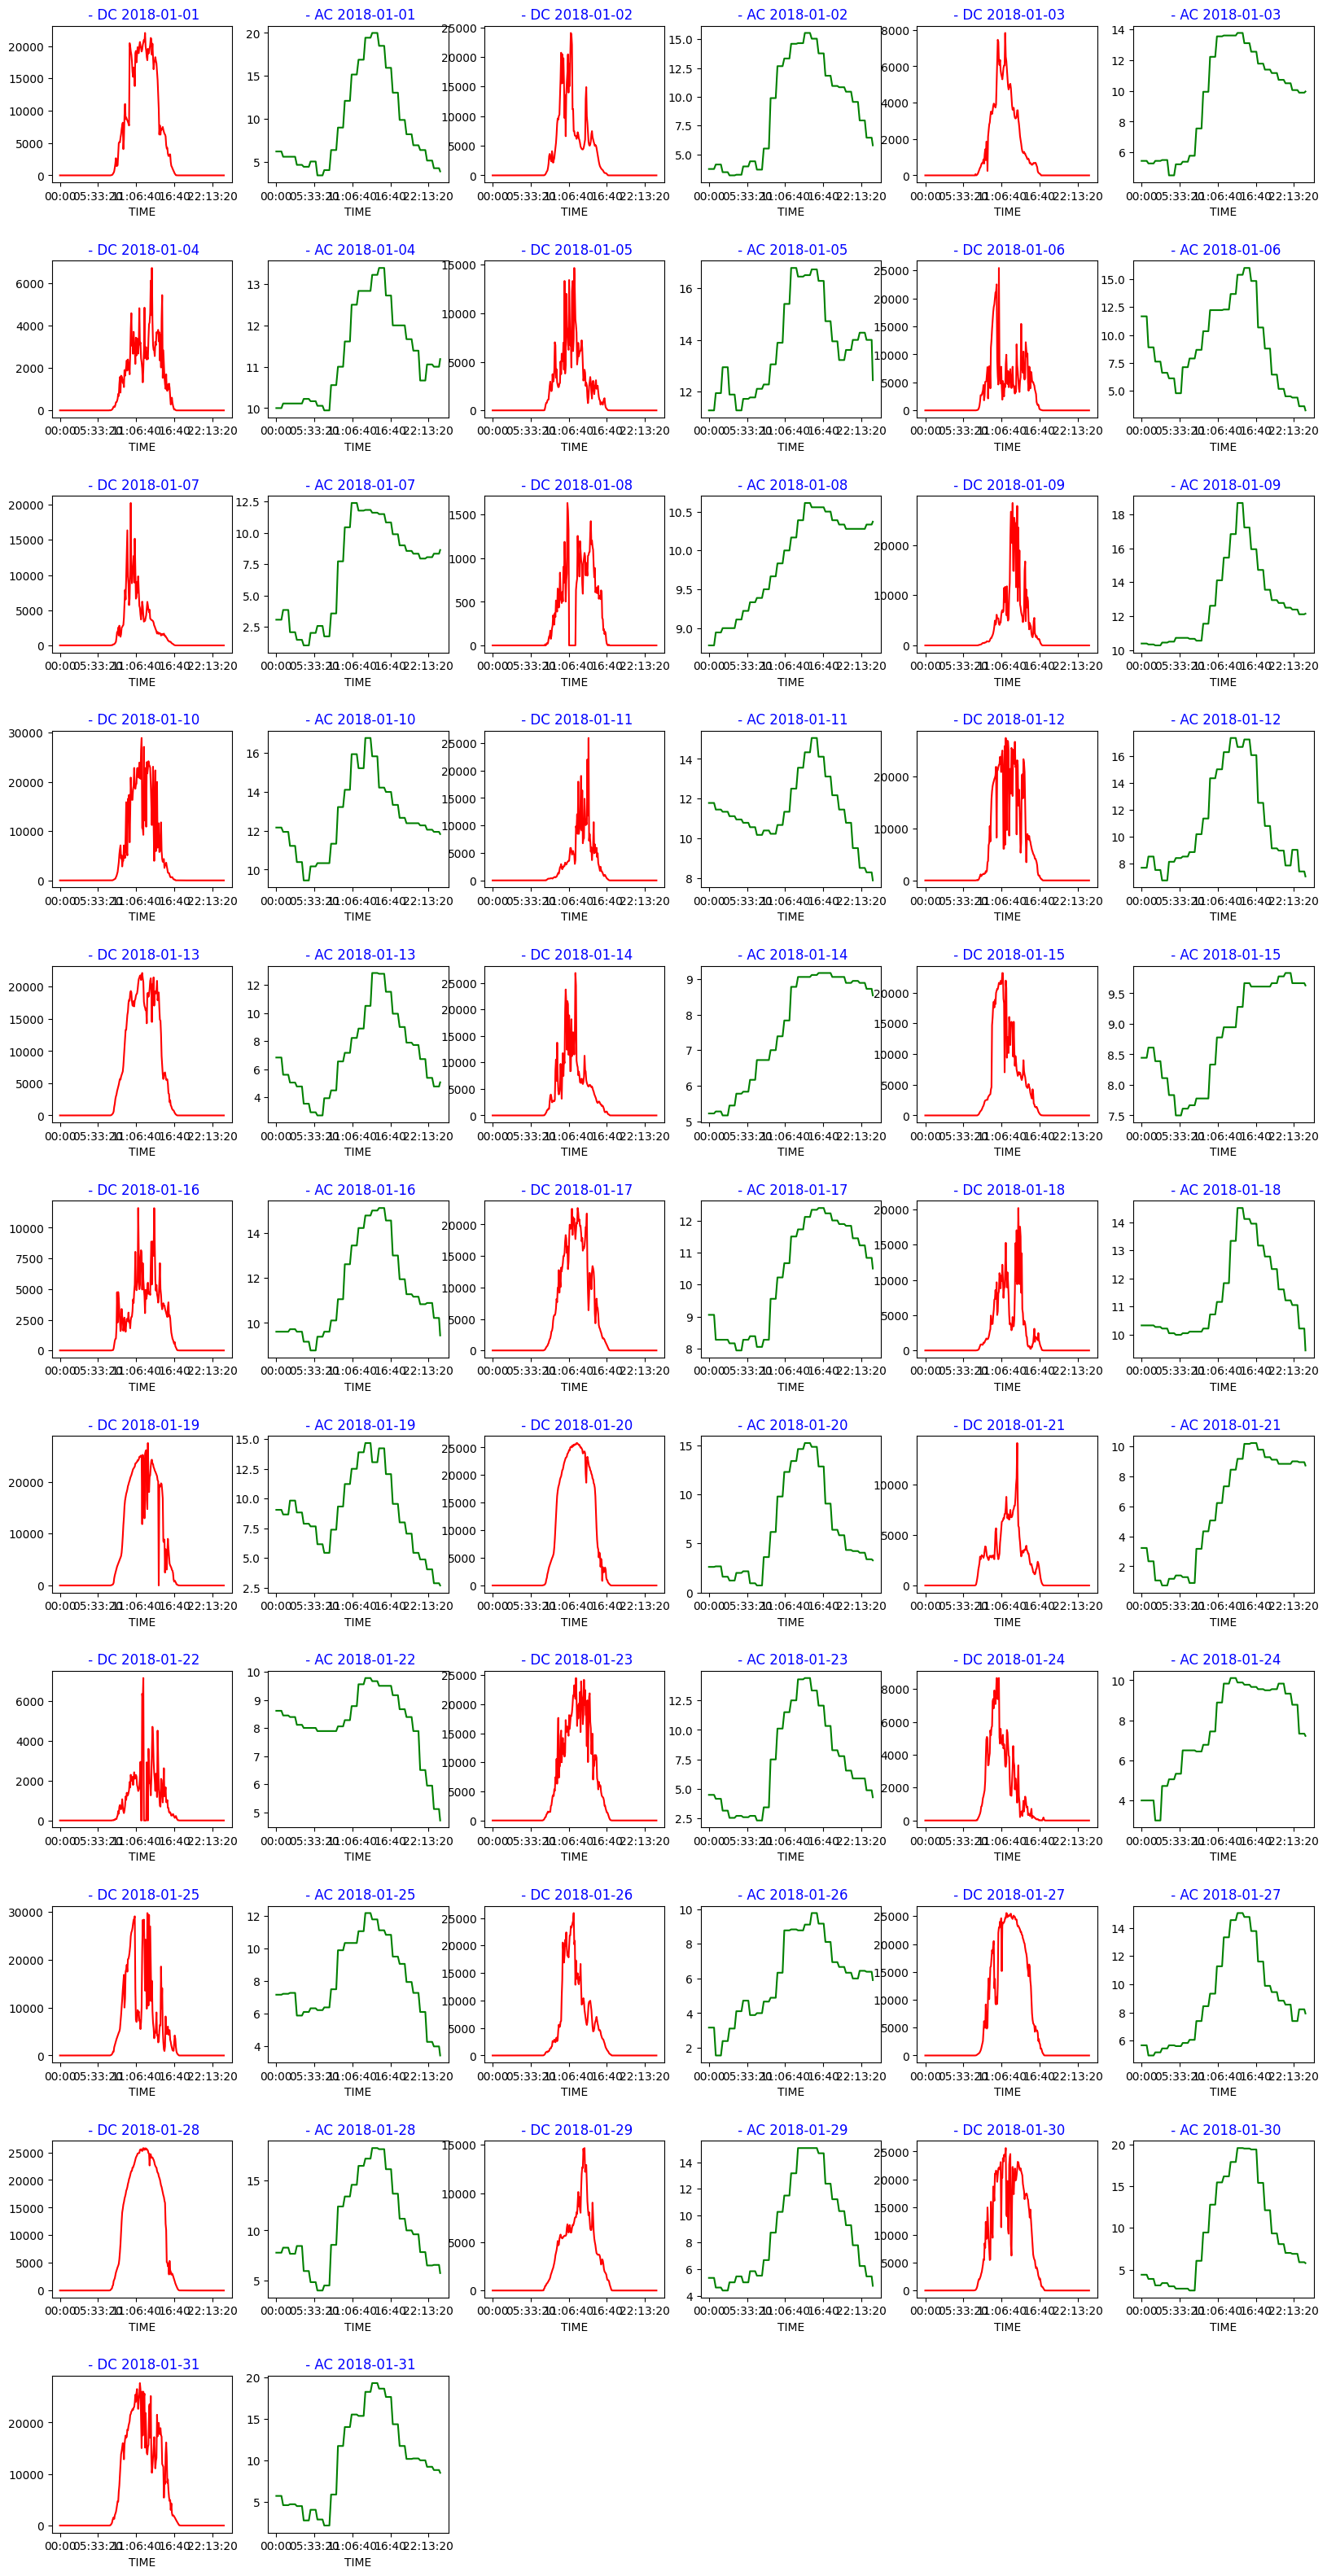

In [14]:
import matplotlib.pyplot as plt



# Select the relevant columns for inverter 01's DC power and ambient temperature

df_temp_dc_01 = df_18_jan[['TIME', 'DATE', '01_dc_power', 'ambient_temp']]



# Create pivot tables for both DC power and ambient temperature

solar_dc_01 = df_temp_dc_01.pivot_table(values='01_dc_power', index='TIME', columns='DATE')

ambient_temp_01 = df_temp_dc_01.pivot_table(values='ambient_temp', index='TIME', columns='DATE')

# Define the Daywise plot function

def Daywise_plot(data_dc=None, data_temp=None, row=None, col=None, title=''):

    cols = data_dc.columns  # Get all the columns for plotting



    # Calculate total number of subplots needed

    num_subplots = len(cols) * 2



    # Calculate rows and columns to fit all subplots



    row = int(np.ceil(num_subplots / col)) # Calculate necessary rows






    gp = plt.figure(figsize=(20, 40))  # Adjust figure size as needed



    # Adjust subplots spacing

    gp.subplots_adjust(wspace=0.2, hspace=0.5)



    for i in range(1, len(cols) + 1):

        # Plot DC power for inverter 01

        ax1 = gp.add_subplot(row, col, 2*i-1)  # Create subplot for DC power

        data_dc[cols[i - 1]].plot(ax=ax1, color='red')

        ax1.set_title('{} - DC {}'.format(title, cols[i - 1]), color='blue')



        # Plot Ambient Temperature

        ax2 = gp.add_subplot(row, col, 2*i)  # Create subplot for Ambient Temperature

        data_temp[cols[i - 1]].plot(ax=ax2, color='green')

        ax2.set_title('{} - AC {}'.format(title, cols[i - 1]), color='blue')



# Call the function for Daywise plotting with both DC power and ambient temperature

Daywise_plot(data_dc=solar_dc_01, data_temp=ambient_temp_01, row=6, col=6)  # Adjust row and col for better layout # Increased column count for better layout

In [15]:
import pandas as pd

df_1_Y = df_1.copy()

df_1_Y['measured_on'] = pd.to_datetime(df_1_Y['measured_on'])



df_1_Y.set_index('measured_on', inplace=True)

# Exclude non-numeric columns from the mean calculation

df_1_Y = df_1_Y.resample('Y').mean(numeric_only=True)

df_1_Y

,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,02_ac_power,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
measured_on,,,,,,,,,,,,,,,,,,,,,
2017-12-31,4.435283,224.987791,3.574487,95.864675,3.100930,4.820851,229.541514,3.823357,96.360003,3.337045,...,0.027847,0.028468,0.028503,0.028581,0.028704,0.028893,0.029281,0.029524,0.028872,0.029187
2018-12-31,7.867697,281.558490,6.041252,124.279087,5.101948,8.164001,298.984350,6.246619,130.234875,5.296298,...,0.042326,0.040244,0.040233,0.040985,0.041642,0.041865,0.042319,0.042507,0.036153,0.035200
2019-12-31,10.299977,351.656216,7.856896,144.053472,6.739747,9.247780,336.693468,7.088377,135.604912,6.138051,...,0.045913,0.046040,0.039555,0.045649,0.044400,0.045687,0.038340,0.046677,0.045187,0.045596
2020-12-31,11.376895,356.331219,8.685500,150.677341,7.348514,9.650526,338.056836,7.370990,144.386009,6.226848,...,0.046082,0.046242,0.041449,0.046034,0.045791,0.045996,0.042694,0.046707,0.044108,0.041328
2021-12-31,9.953595,316.293157,7.535040,135.479734,6.431411,9.714848,314.664057,7.396683,135.885972,6.355855,...,0.040279,0.036050,0.041698,0.040208,0.039799,0.041026,0.039962,0.041656,0.035957,0.041176
2022-12-31,8.834193,272.624800,6.636944,117.347972,5.694401,8.415925,275.511301,6.354915,119.426751,5.440208,...,0.042764,0.043443,0.042973,0.042691,0.041417,0.042695,0.043206,0.043306,0.043074,0.038766
2023-12-31,12.093911,359.110109,8.867934,156.282507,7.630291,11.341842,354.449475,8.278373,156.131533,7.118142,...,0.043265,0.045170,0.040966,0.046550,0.047985,0.048119,0.047124,0.048995,0.048488,0.048987


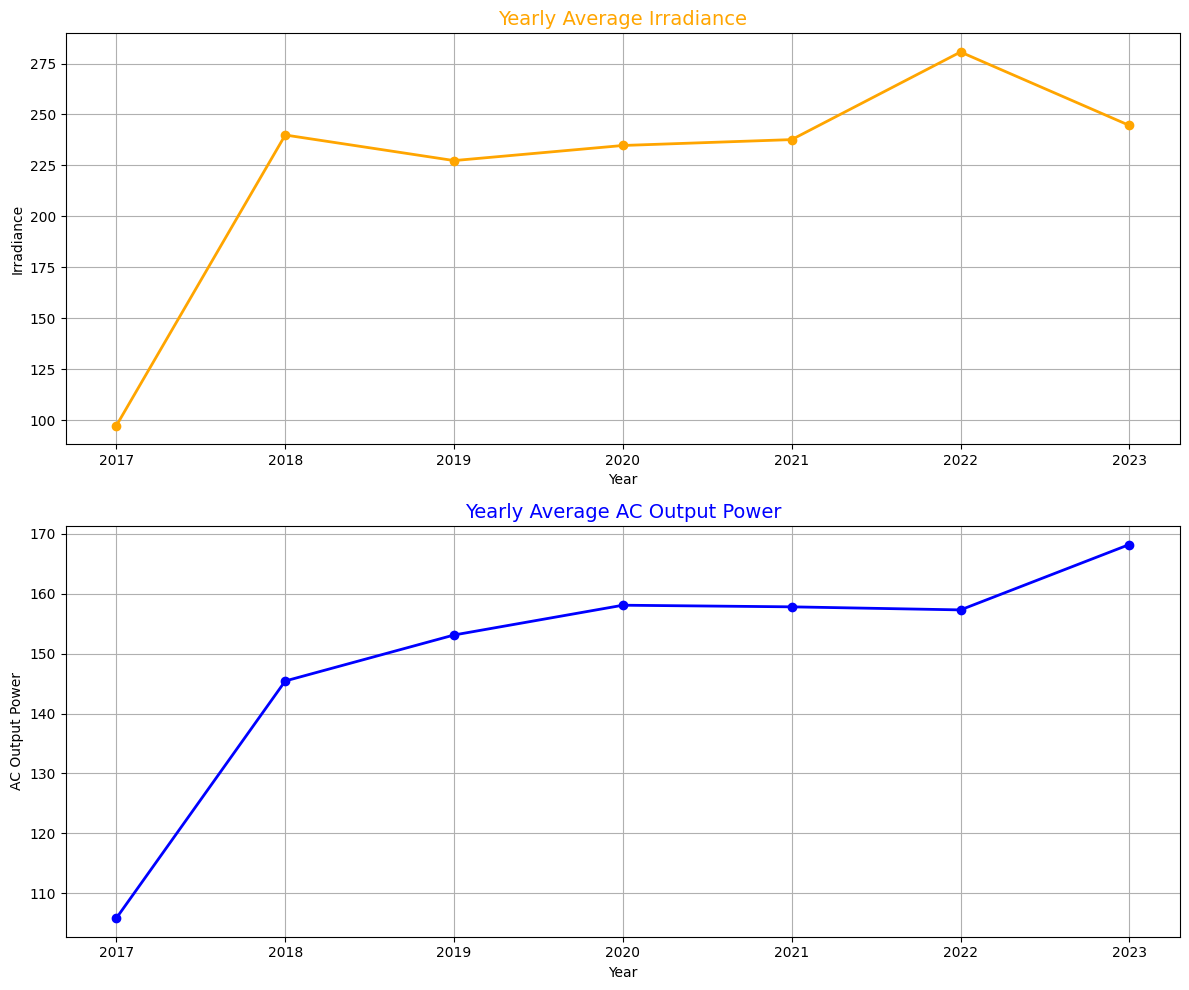

In [16]:
import matplotlib.pyplot as plt



# Assuming 'irradiance' and 'AC output' are the relevant column names

irr_col = 'poa_irradiance'  # Replace with the actual column name for irradiance in your data if different

ac_output_col = 'revenue_ac_output'  # Replace with the actual column name for AC output in your data if different



# Create the plot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))



# Plot the irradiance

axes[0].plot(df_1_Y.index.year, df_1_Y[irr_col], marker='o', linestyle='-', color='orange', linewidth=2)

axes[0].set_title('Yearly Average Irradiance', fontsize=14, color='orange')

axes[0].set_xlabel('Year')

axes[0].set_ylabel('Irradiance')

axes[0].grid(visible=True)



# Plot the AC output power

axes[1].plot(df_1_Y.index.year, df_1_Y[ac_output_col], marker='o', linestyle='-', color='blue', linewidth=2)

axes[1].set_title('Yearly Average AC Output Power', fontsize=14, color='blue')

axes[1].set_xlabel('Year')

axes[1].set_ylabel('AC Output Power')

axes[1].grid(visible=True)



# Adjust layout for better spacing

plt.tight_layout()

plt.show()


In [17]:
df_1.head()

,measured_on,01_dc_current,01_dc_voltage,01_ac_current,01_ac_voltage,01_ac_power,02_dc_current,02_dc_voltage,02_ac_current,02_ac_voltage,...,15_efficiency %,16_efficiency %,17_efficiency %,18_efficiency %,19_efficiency %,20_efficiency %,21_efficiency %,22_efficiency %,23_efficiency %,24_efficiency %
1,2017-12-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-12-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-12-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-12-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2017-12-01 00:25:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


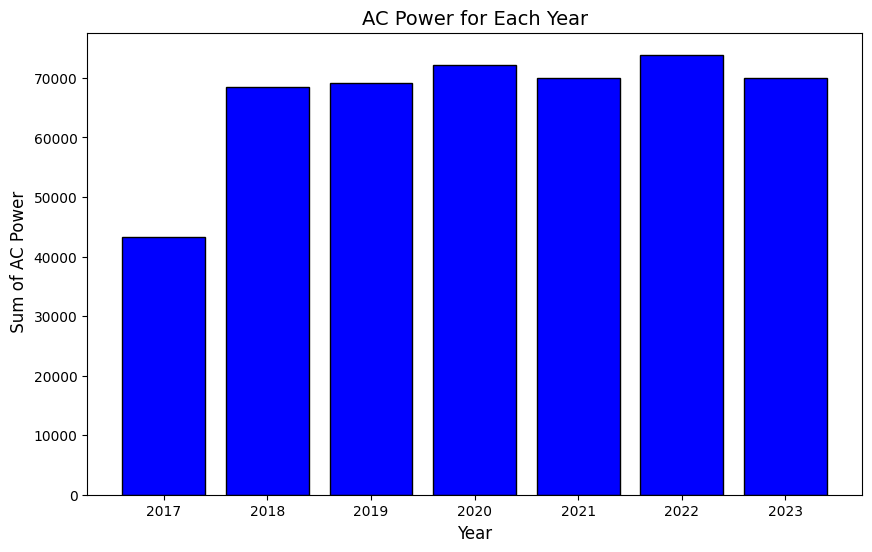

In [18]:
import pandas as pd

import matplotlib.pyplot as plt



# Ensure 'measured_on' is a datetime type

df_1['measured_on'] = pd.to_datetime(df_1['measured_on'])



# Sum the AC power daily

df_1['sum_ac'] = df_1.groupby(df_1['measured_on'].dt.date)['revenue_ac_output'].transform('sum')



# Filter data for the years 2017 to 2023

years = range(2017, 2024)



# Initialize a list to store the largest value of each year

largest_values_of_years = []



# Loop through the years 2017 to 2023

for year in years:

    # Filter data for the specific year

    df_year = df_1[df_1['measured_on'].dt.year == year]



    # Get the maximum value of 'sum_ac' for the year

    max_value = df_year['sum_ac'].max()



    # Append the maximum value of the year to the list

    largest_values_of_years.append(max_value)



# Plot the histogram with the years on the x-axis

plt.figure(figsize=(10, 6))

plt.bar(years, largest_values_of_years, color='blue', edgecolor='black')

plt.title('AC Power for Each Year', fontsize=14)

plt.xlabel('Year', fontsize=12)

plt.ylabel(' Sum of AC Power', fontsize=12)

plt.xticks(years)  # Set x-axis to show the years

plt.show()


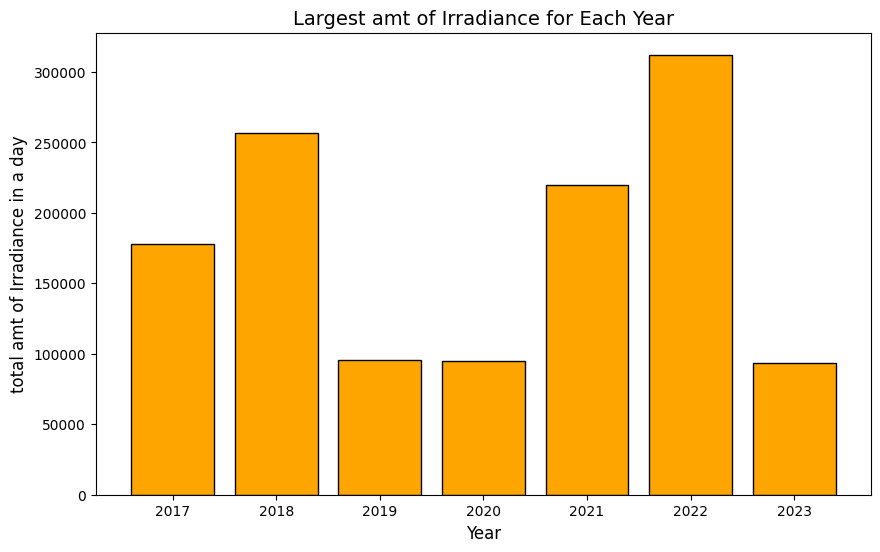

In [19]:
import pandas as pd

import matplotlib.pyplot as plt



# Ensure 'measured_on' is a datetime type

df_1['measured_on'] = pd.to_datetime(df_1['measured_on'])



# Sum the irradiance daily

df_1['sum_irradiance'] = df_1.groupby(df_1['measured_on'].dt.date)['poa_irradiance'].transform('sum')



# Filter data for the years 2017 to 2023

years = range(2017, 2024)



# Initialize a list to store the largest value of irradiance for each year

largest_irradiance_values = []



# Loop through the years 2017 to 2023

for year in years:

    # Filter data for the specific year

    df_year = df_1[df_1['measured_on'].dt.year == year]



    # Get the maximum value of 'sum_irradiance' for the year

    max_irradiance_value = df_year['sum_irradiance'].max()



    # Append the maximum value of the year to the list

    largest_irradiance_values.append(max_irradiance_value)



# Plot the histogram with the years on the x-axis

plt.figure(figsize=(10, 6))

plt.bar(years, largest_irradiance_values, color='orange', edgecolor='black')

plt.title('Largest amt of Irradiance for Each Year', fontsize=14)

plt.xlabel('Year', fontsize=12)

plt.ylabel('total amt of Irradiance in a day', fontsize=12)

plt.xticks(years)  # Set x-axis to show the years

plt.show()


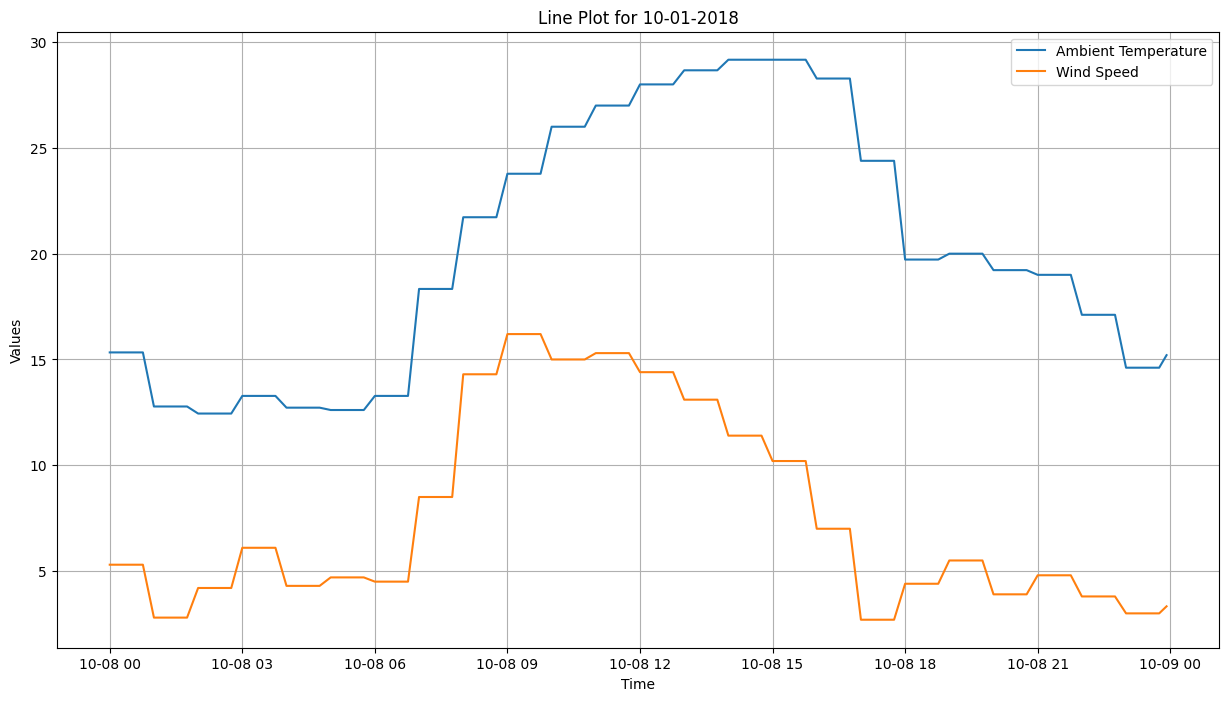

In [20]:
# prompt: PLOT THE LINEPLOT OF AC POWER DC POWER EFFICICNY TEMP  AND WIDNSPEED OF 10-01-18



# Filter data for 10-01-2018

df_2018_08_10 = df_1[df_1['measured_on'].dt.date == pd.to_datetime('2018-10-08').date()]



# Plot the lineplot

plt.figure(figsize=(15, 8))





plt.plot(df_2018_08_10['measured_on'], df_2018_08_10['ambient_temp'], label='Ambient Temperature')

plt.plot(df_2018_08_10['measured_on'], df_2018_08_10['wind_speed'], label='Wind Speed')





plt.xlabel('Time')

plt.ylabel('Values')

plt.title('Line Plot for 10-01-2018')

plt.legend()

plt.grid(True)

plt.show()

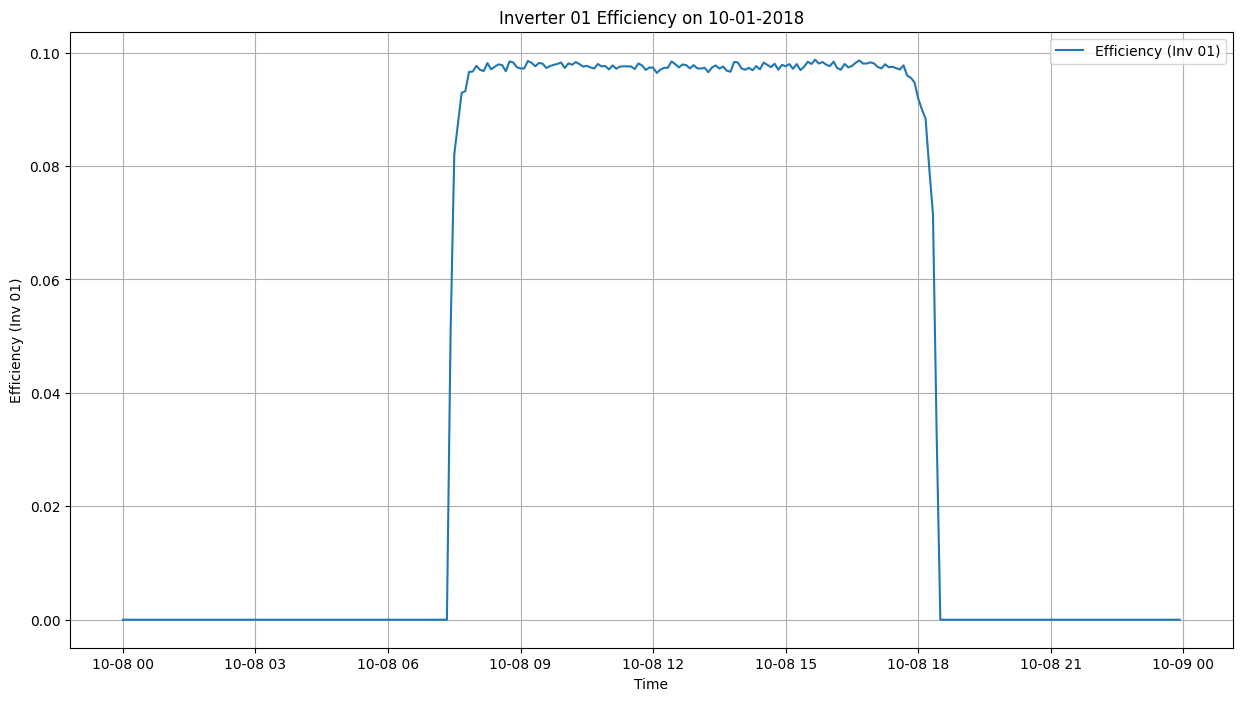

In [21]:
import matplotlib.pyplot as plt

import pandas as pd



# Assuming 'df_2018_01_10' is your DataFrame

# and 'measured_on' and '01_efficiency' are your columns



plt.figure(figsize=(15, 8))  # Adjust figure size if needed



plt.plot(df_2018_08_10['measured_on'], df_2018_08_10['01_efficiency %'], label='Efficiency (Inv 01)')



plt.xlabel('Time')  # Set x-axis label

plt.ylabel('Efficiency (Inv 01)')  # Set y-axis label

plt.title('Inverter 01 Efficiency on 10-01-2018')  # Set title

plt.legend()  # Display legend

plt.grid(True)  # Add grid lines



plt.show()  # Display the plot

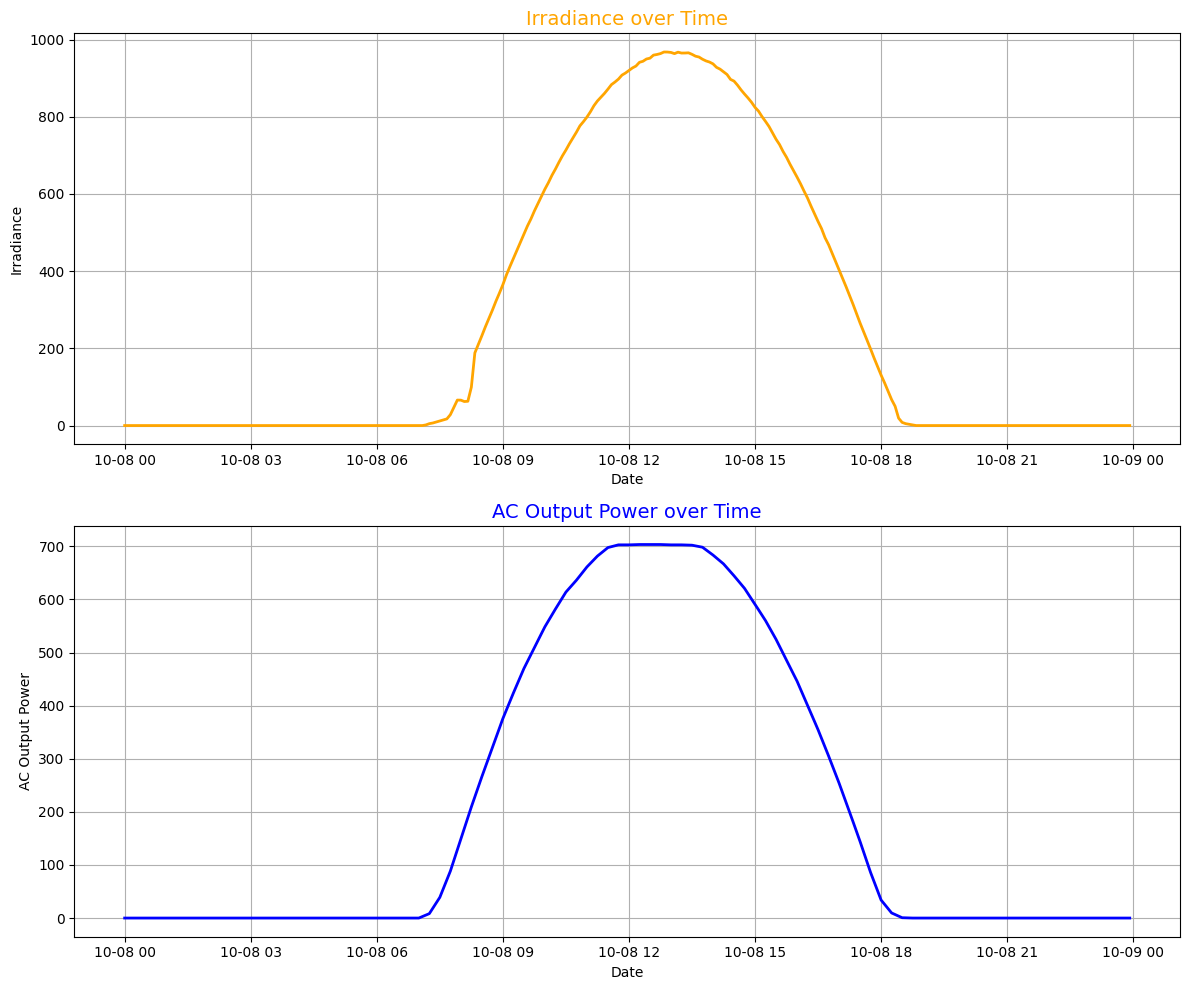

In [22]:
import matplotlib.pyplot as plt



# Replace these with the actual column names for irradiance and AC output in your dataframe

irr_col = 'poa_irradiance'  # Update with the actual column name for irradiance

ac_output_col = 'revenue_ac_output'  # Update with the actual column name for AC output



# Create the plot with two subplots, one above the other

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))



# Plot the irradiance

axes[0].plot(df_2018_08_10['measured_on'], df_2018_08_10[irr_col], color='orange', linestyle='-', linewidth=2)

axes[0].set_title('Irradiance over Time', fontsize=14, color='orange')

axes[0].set_xlabel('Date')

axes[0].set_ylabel('Irradiance')

axes[0].grid(visible=True)



# Plot the AC output power

axes[1].plot(df_2018_08_10['measured_on'], df_2018_08_10[ac_output_col], color='blue', linestyle='-', linewidth=2)

axes[1].set_title('AC Output Power over Time', fontsize=14, color='blue')

axes[1].set_xlabel('Date')

axes[1].set_ylabel('AC Output Power')

axes[1].grid(visible=True)



# Adjust layout for better spacing

plt.tight_layout()

plt.show()


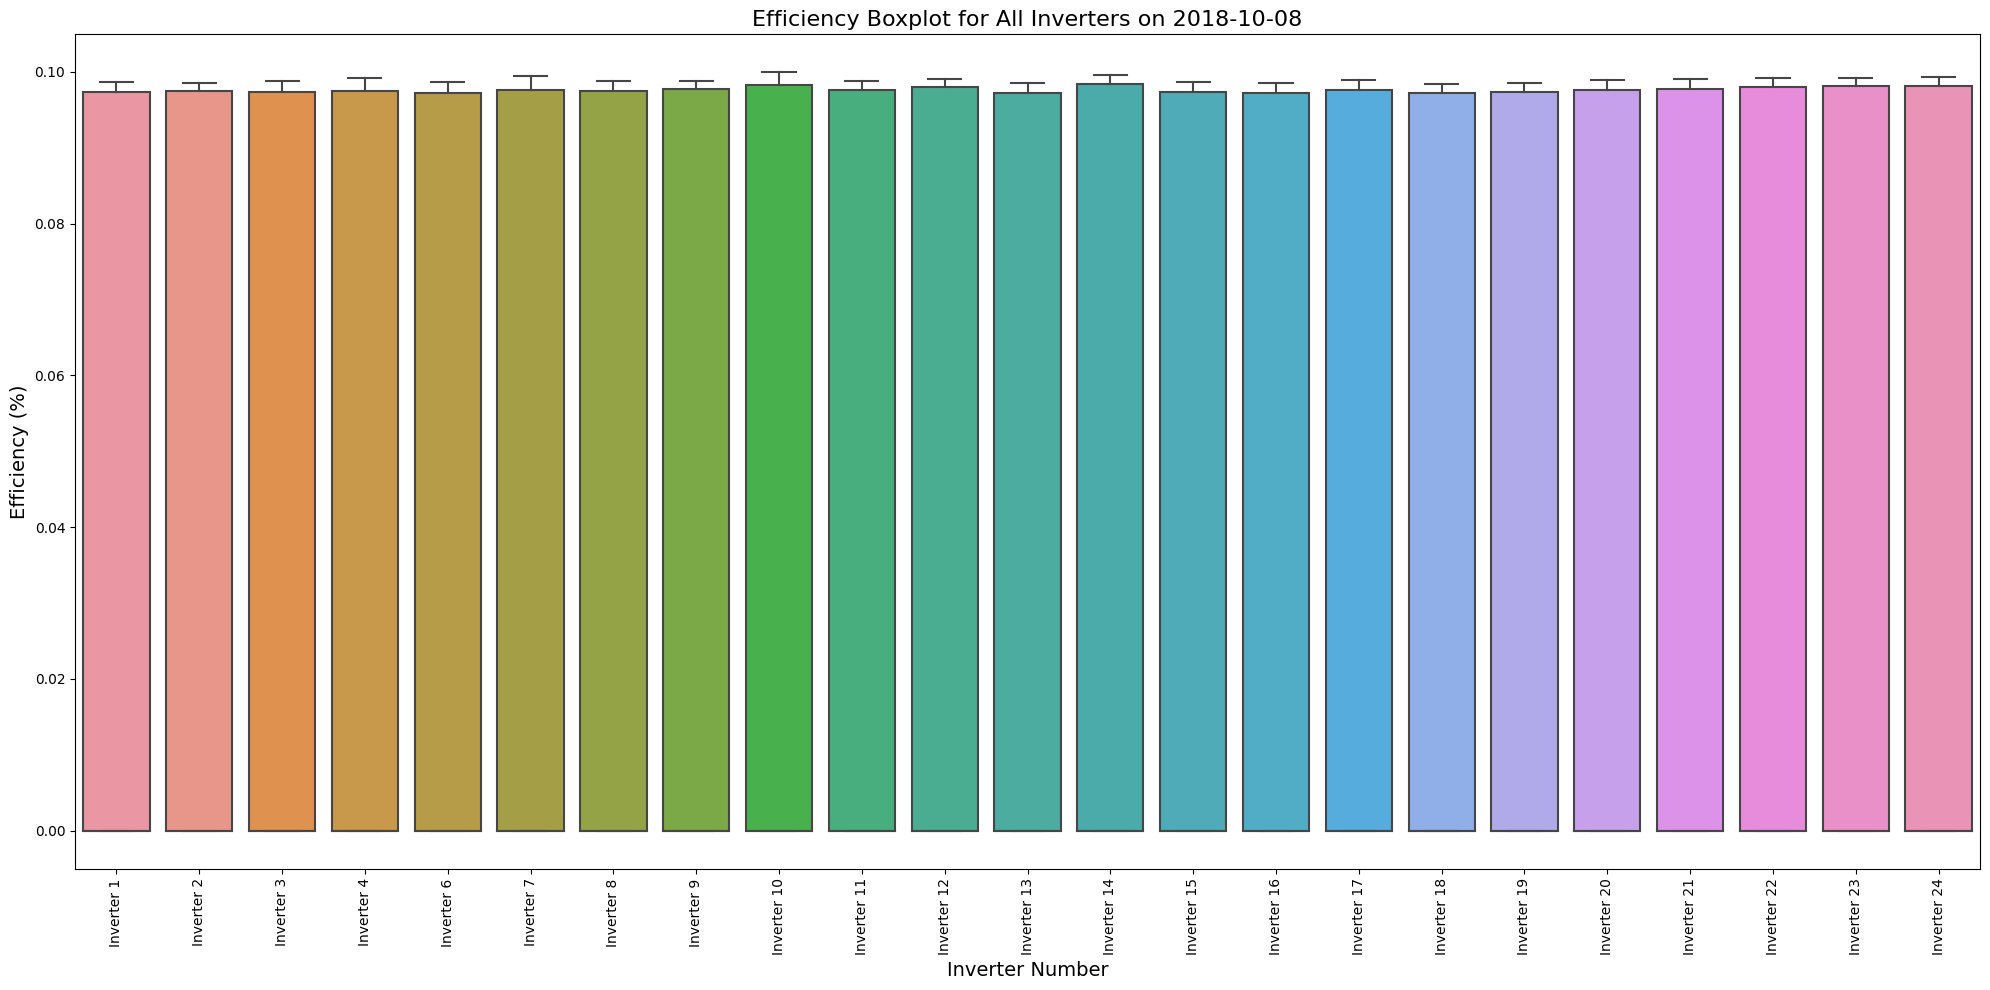

In [23]:
import matplotlib.pyplot as plt

import seaborn as sns



# List of inverter numbers excluding 05 (if necessary)

inverter_numbers = [i for i in range(1, 25) if i != 5]



# Create a list to store the efficiency columns for each inverter

efficiency_columns = [f"{i:02d}_efficiency %" for i in inverter_numbers]



# Set up the plot (multiple boxplots)

plt.figure(figsize=(20, 10))



# Create a boxplot for each inverter's efficiency

sns.boxplot(data=df_2018_08_10[efficiency_columns])



# Set title and labels

plt.title('Efficiency Boxplot for All Inverters on 2018-10-08', fontsize=16)

plt.xlabel('Inverter Number', fontsize=14)

plt.ylabel('Efficiency (%)', fontsize=14)



# Display the plot

plt.xticks(ticks=range(len(efficiency_columns)), labels=[f"Inverter {i}" for i in inverter_numbers], rotation=90)

plt.tight_layout()

plt.show()


3890/3890 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


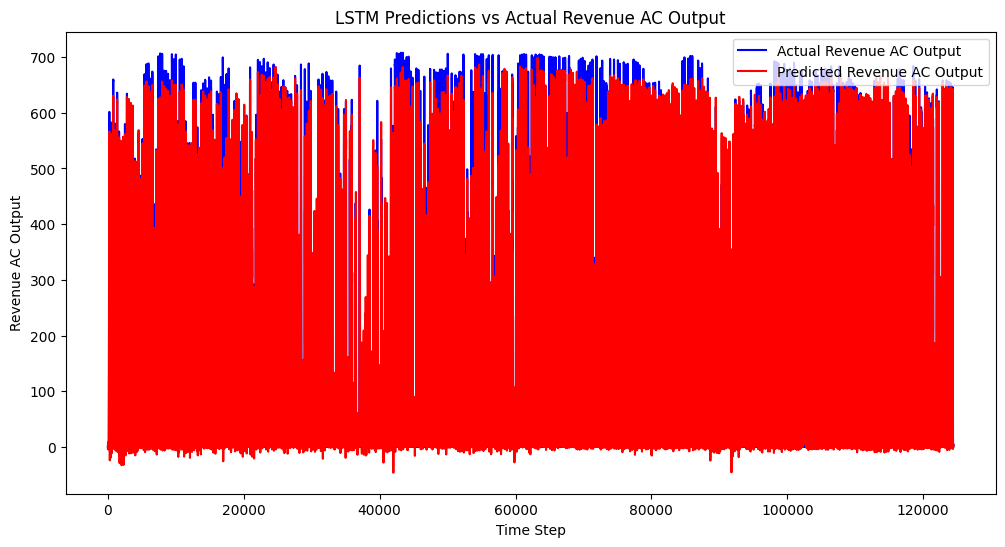

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import io
import base64
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Assuming df_1 is your dataset
# Define the columns
efficiency_cols = [f"{i:02d}_efficiency %" for i in range(1, 25) if i != 5]
feature_cols = efficiency_cols + ['poa_irradiance', 'ambient_temp', 'wind_speed']
target_col = 'revenue_ac_output'

# Drop rows with missing values in the selected columns
df_lstm = df_1[feature_cols + [target_col]].dropna()

# Normalize the features and target separately
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

normalized_features = scaler_features.fit_transform(df_lstm[feature_cols])
normalized_target = scaler_target.fit_transform(df_lstm[[target_col]])

# Create sequences for LSTM input
sequence_length = 30  # Length of sequences (e.g., last 30 timesteps)
X = []
y = []

for i in range(sequence_length, len(normalized_features)):
    X.append(normalized_features[i-sequence_length:i])  # Past `sequence_length` timesteps for input
    y.append(normalized_target[i])  # Target at the next timestep

X = np.array(X)
y = np.array(y)

# Manually split data into training and testing sets (e.g., 80% for training and 20% for testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(32))
model.add(Dense(1))  # Output layer for predicting `revenue_ac_output`

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Make predictions
predicted_values = model.predict(X_test)
predicted_values = scaler_target.inverse_transform(predicted_values)  # Inverse transform to original scale
y_test_original = scaler_target.inverse_transform(y_test)  # Inverse transform for comparison

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Revenue AC Output', color='blue')
plt.plot(predicted_values, label='Predicted Revenue AC Output', color='red')
plt.title('LSTM Predictions vs Actual Revenue AC Output')
plt.xlabel('Time Step')
plt.ylabel('Revenue AC Output')
plt.legend()

# Save the plot to a BytesIO object
img_bytes = io.BytesIO()
plt.savefig(img_bytes, format='png')
img_bytes.seek(0)
img_base64 = base64.b64encode(img_bytes.read()).decode('utf-8')

# Create Dash App
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1('LSTM Forecasting Model for Revenue AC Output'),
    html.Div([
        html.H3('Predictions vs Actual Revenue AC Output'),
        html.Img(src=f"data:image/png;base64,{img_base64}")
    ]),
    html.Div([
        dcc.Graph(
            id='time-series-plot',
            figure={
                'data': [
                    {'x': list(range(len(y_test_original))), 'y': y_test_original.flatten(), 'type': 'line', 'name': 'Actual'},
                    {'x': list(range(len(predicted_values))), 'y': predicted_values.flatten(), 'type': 'line', 'name': 'Predicted'},
                ],
                'layout': {
                    'title': 'LSTM Predictions vs Actual Revenue AC Output',
                    'xaxis': {'title': 'Time Step'},
                    'yaxis': {'title': 'Revenue AC Output'},
                    'legend': {'x': 0, 'y': 1}
                }
            }
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

In [27]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.7 MB/s eta 0:00:0000:0100:01


In [24]:
import numpy as np

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt



# Extract efficiency columns

efficiency_cols = [f"{i:02d}_efficiency %" for i in range(1, 25) if i != 5]

feature_cols = efficiency_cols + ['poa_irradiance', 'ambient_temp', 'wind_speed']

target_col = 'revenue_ac_output'



# Drop rows with missing values in the selected columns

df_lstm = df_1[feature_cols + [target_col]].dropna()



# Normalize the features and target separately

scaler_features = MinMaxScaler(feature_range=(0, 1))

scaler_target = MinMaxScaler(feature_range=(0, 1))



normalized_features = scaler_features.fit_transform(df_lstm[feature_cols])

normalized_target = scaler_target.fit_transform(df_lstm[[target_col]])



# Create sequences for LSTM input

sequence_length = 48  # Length of sequences (e.g., last 30 timesteps)

X = []

y = []



for i in range(sequence_length, len(normalized_features)):

    X.append(normalized_features[i-sequence_length:i])  # Past `sequence_length` timesteps for input

    y.append(normalized_target[i])  # Target at the next timestep



X = np.array(X)

y = np.array(y)



# Manually split data into training and testing sets (e.g., 80% for training and 20% for testing)

train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]

y_train, y_test = y[:train_size], y[train_size:]



# Build the LSTM model

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))

model.add(LSTM(32))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for learning rate adjustment and early stopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(X_train, y_train, epochs=50, batch_size=6, validation_data=(X_test, y_test),
          verbose=1, callbacks=[lr_scheduler, early_stopping])



# Make predictions

predicted_values = model.predict(X_test)

predicted_values = scaler_target.inverse_transform(predicted_values)  # Inverse transform to original scale

y_test_original = scaler_target.inverse_transform(y_test)  # Inverse transform for comparison



# Plot the results

plt.figure(figsize=(12, 6))

plt.lineplot(y_test_original, label='Actual Revenue AC Output', color='blue')

plt.lineplot(predicted_values, label='Predicted Revenue AC Output', color='red')

plt.title('LSTM Predictions vs Actual Revenue AC Output')

plt.xlabel('Time Step')

plt.ylabel('Revenue AC Output')

plt.legend()

plt.show()


Epoch 1/50
12344/82966 ━━━━━━━━━━━━━━━━━━━━ 6:53 6ms/step - loss: 0.0018

KeyboardInterrupt: 

In [ ]:
# Plot the results as a scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for actual values
plt.scatter(range(len(y_test_original)), y_test_original, label='Actual Revenue AC Output', color='blue', alpha=0.6)

# Scatter plot for predicted values
plt.scatter(range(len(predicted_values)), predicted_values, label='Predicted Revenue AC Output', color='red', alpha=0.6)

# Add title and labels
plt.title('LSTM Predictions vs Actual Revenue AC Output')
plt.xlabel('Time Step')
plt.ylabel('Revenue AC Output')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
model.save('solar_panel_lstm_model.h5')  # Save in .h5 format

In [ ]:
import numpy as np

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt



# Extract efficiency columns

efficiency_cols = [f"{i:02d}_efficiency %" for i in range(1, 25) if i != 5]

feature_cols = efficiency_cols + ['poa_irradiance', 'ambient_temp', 'wind_speed']

target_col = 'revenue_ac_output'



# Drop rows with missing values in the selected columns

df_lstm = df_1[feature_cols + [target_col]].dropna()



# Normalize the features and target separately

scaler_features = MinMaxScaler(feature_range=(0, 1))

scaler_target = MinMaxScaler(feature_range=(0, 1))



normalized_features = scaler_features.fit_transform(df_lstm[feature_cols])

normalized_target = scaler_target.fit_transform(df_lstm[[target_col]])



# Create sequences for LSTM input

sequence_length = 48  # Length of sequences (e.g., last 30 timesteps)

X = []

y = []



for i in range(sequence_length, len(normalized_features)):

    X.append(normalized_features[i-sequence_length:i])  # Past `sequence_length` timesteps for input

    y.append(normalized_target[i])  # Target at the next timestep



X = np.array(X)

y = np.array(y)



# Manually split data into training and testing sets (e.g., 80% for training and 20% for testing)

train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]

y_train, y_test = y[:train_size], y[train_size:]



# Build the LSTM model

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))

model.add(LSTM(32))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for learning rate adjustment and early stopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test),
          verbose=1, callbacks=[lr_scheduler, early_stopping])



# Make predictions

predicted_values = model.predict(X_test)

predicted_values = scaler_target.inverse_transform(predicted_values)  # Inverse transform to original scale

y_test_original = scaler_target.inverse_transform(y_test)  # Inverse transform for comparison



# Plot the results

plt.figure(figsize=(12, 6))

plt.lineplot(y_test_original, label='Actual Revenue AC Output', color='blue')

plt.lineplot(predicted_values, label='Predicted Revenue AC Output', color='red')

plt.title('LSTM Predictions vs Actual Revenue AC Output')

plt.xlabel('Time Step')

plt.ylabel('Revenue AC Output')

plt.legend()

plt.show()


In [ ]:
import pandas as pd

# Assume `data` is your DataFrame
df_1.to_csv('f_df_1.csv', index=False)


In [ ]:
df_1_Y.to_csv('f_df_1_y.csv', index=False)

In [ ]:
df_18.to_csv('f_df_18.csv', index=False)

In [ ]:
df_18_jan_clean.to_csv('f_df_18_jan_clean.csv', index=False)

In [ ]:
# THIS IS THE INNITIAL


import numpy as np

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt



# Extract efficiency columns

efficiency_cols = [f"{i:02d}_efficiency %" for i in range(1, 25) if i != 5]

feature_cols = efficiency_cols + ['poa_irradiance', 'ambient_temp', 'wind_speed']

target_col = 'revenue_ac_output'



# Drop rows with missing values in the selected columns

df_lstm = df_1[feature_cols + [target_col]].dropna()



# Normalize the features and target separately

scaler_features = MinMaxScaler(feature_range=(0, 1))

scaler_target = MinMaxScaler(feature_range=(0, 1))



normalized_features = scaler_features.fit_transform(df_lstm[feature_cols])

normalized_target = scaler_target.fit_transform(df_lstm[[target_col]])



# Create sequences for LSTM input

sequence_length = 30  # Length of sequences (e.g., last 30 timesteps)

X = []

y = []



for i in range(sequence_length, len(normalized_features)):

    X.append(normalized_features[i-sequence_length:i])  # Past `sequence_length` timesteps for input

    y.append(normalized_target[i])  # Target at the next timestep



X = np.array(X)

y = np.array(y)



# Manually split data into training and testing sets (e.g., 80% for training and 20% for testing)

train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]

y_train, y_test = y[:train_size], y[train_size:]



# Build the LSTM model

model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))

model.add(LSTM(32))

model.add(Dense(1))  # Output layer for predicting `revenue_ac_output`



model.compile(optimizer='adam', loss='mean_squared_error')



# Train the model

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)



# Make predictions

predicted_values = model.predict(X_test)

predicted_values = scaler_target.inverse_transform(predicted_values)  # Inverse transform to original scale

y_test_original = scaler_target.inverse_transform(y_test)  # Inverse transform for comparison



# Plot the results

plt.figure(figsize=(12, 6))

plt.plot(y_test_original, label='Actual Revenue AC Output', color='blue')

plt.plot(predicted_values, label='Predicted Revenue AC Output', color='red')

plt.title('LSTM Predictions vs Actual Revenue AC Output')

plt.xlabel('Time Step')

plt.ylabel('Revenue AC Output')

plt.legend()

plt.show()

In [ ]:
# Save the entire model
model.save('lstm_model_new.h5')
h

3890/3890 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step


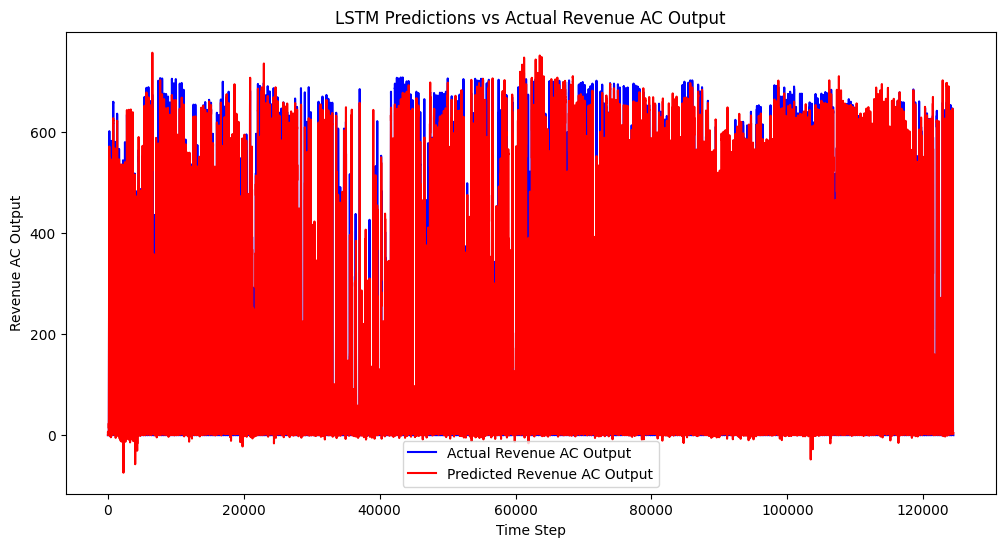

In [30]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load the saved model
model = load_model("/kaggle/input/lstm/tensorflow2/default/1/lstm_model_new.h5")

# Ensure that X_test is in the correct shape
# The model expects 3D input (samples, timesteps, features)
# Assuming that X_test is already prepared in this shape

# Make predictions
predicted_values = model.predict(X_test)

# If you scaled the target values, inverse transform them to the original scale
# Assuming `scaler_target` was used to scale the target data for `y`
predicted_values_original = scaler_target.inverse_transform(predicted_values)

# Optionally, inverse-transform the test target values for comparison
y_test_original = scaler_target.inverse_transform(y_test)

# Plotting the results (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Revenue AC Output', color='blue')
plt.plot(predicted_values_original, label='Predicted Revenue AC Output', color='red')
plt.title('LSTM Predictions vs Actual Revenue AC Output')
plt.xlabel('Time Step')
plt.ylabel('Revenue AC Output')
plt.legend()
plt.show()


In [34]:
X_test.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'